https://drive.google.com/drive/folders/1vsAR2_rjRZkqNX4A52cWYbbxtwCDEKdt



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_rows = 5

import warnings
warnings.filterwarnings("ignore")

In [2]:
pathh = 'datasets_qiang/'
london_files = ['UK_international-visits','london_earnings_by_borough','london_economic_activity',
                'london_infrastructure_spending','london_sports_participation','london_taxpayer_income',
                'london_ticket_sales','london_tickets_for_sale','UK_inflation','london_underground_activity',
                'london_underground_station_info']

Rio_files = ['brazil_gdp','brazil_monthly_income','brazil_unemployment','brazil_tourism_jobs','brazil_international_arrivals']

vancouver_files = ['vancouver_turism_indicators','vancouver_employment_by_industry','vancouver_business_size',
                   'vancouver_small_business_by_region','vancouver_visits','vancouver_room_revenues_2000_2010',
                  'vancouver_room_revenues_2010_2019','region_codes']


### UK data
UK_international-visits： 2002-2019 --》tour的变化，但肯定和形式有关系，like脱欧之后tour数量肯定变少。但2012年tour应该增加很多。

可以：在奥运期间增加的visits

不可以：因为奥运 之后增加的tour，除非我能control什么 然后模拟出变化曲线

london_earnings_by_borough：identity??? 感觉这个data highly missing。。。哦哦哦average pay，可能可以用，就是每个地区average 工资变化

london_economic_activity：emm应该和london_earnings_by_borough一起看，关于人员构成

london_infrastructure_spending：奥运会花了多少钱～可以和别的地方比对一下

london_sports_participation：看london 运动量的增加

london_taxpayer_income(又是survey result):也是by region的。。和

london_earnings_by_borough可能重复？

london_ticket_sales： 票价，通过和london_infrastructure_spending比对可以算出直接支出/收入

london_tickets_for_sale：不懂但结合london_ticket_sales应该能推出支出？

UK_inflation：好久的data lol， 做比较的时候记得用

london_underground_activity：地铁人流量，07-17

london_underground_station_info：用来对应local region，对一下busy程度？要

control这些info来看人流量



In [3]:
#London datasets

"""
ind = 0

l1 = pd.read_csv('{0}london/{1}.csv'.format(pathh,london_files[ind]))
display(london_files[ind])
display(l1)
"""
for ind in range(len(london_files)):
    l1 = pd.read_csv('{0}london/{1}.csv'.format(pathh,london_files[ind]),encoding = "ISO-8859-1")
    display(london_files[ind])
    display(l1.head(3))

'UK_international-visits'

year        quarter   market    dur_stay mode  purpose             area  \
0  2002  January-March  Belgium  1-3 nights  Air  Holiday    TOTAL ENGLAND   
1  2002  January-March  Belgium  1-3 nights  Air  Holiday           LONDON   
2  2002  January-March  Belgium  1-3 nights  Air  Holiday  REST OF ENGLAND   

     visits     spend    nights  sample  
0  4.431616  1.013484  9.530416       6  
1  3.572186  0.969138  6.954456       5  
2  0.859430  0.044346  2.575960       1

'london_earnings_by_borough'

year area_code            area identity pay_type  pay  confidence
0  2002      00AA  City of London   Female   Hourly  NaN         NaN
1  2003      00AA  City of London   Female   Hourly  NaN         NaN
2  2004      00AA  City of London   Female   Hourly  NaN         NaN

'london_economic_activity'

year area_code            area gender  economically_active  \
0  Jan 2005-Dec 2005      00AA  City of London      F               2400.0   
1  Jan 2006-Dec 2006      00AA  City of London      F                  NaN   
2  Jan 2007-Dec 2007      00AA  City of London      F                  NaN   

   working_age  percent  confidence  
0       3600.0     64.4         NaN  
1          NaN      NaN         NaN  
2       1400.0      NaN         NaN

'london_infrastructure_spending'

expense_category       breakdown  baseline_budget  \
0  Site Preparation and Infrastructure      Powerlines            282.0   
1  Site Preparation and Infrastructure       Utilities            256.0   
2  Site Preparation and Infrastructure  Enabling Works            364.0   

   31/12/2011_forecast  31/03/2012_forecast  variance  
0                  286                  287       1.0  
1                  238                  235      -3.0  
2                  386                  386       0.0

'london_sports_participation'

year area_code        area sports_participation  percentage  \
0  2005-2006         A  North East                 one+       0.329   
1  2007-2008         A  North East                 one+       0.348   
2  2008-2009         A  North East                 one+       0.354   

   population  
0    687000.0  
1    730300.0  
2    748600.0

'london_taxpayer_income'

year area_code            area  population  mean_income  median_income
0  1999-2000      00AA  City of London       10000       109800          40400
1  2000-2001      00AA  City of London       10000       137000          65000
2  2001-2002      00AA  City of London       12000        92900          38300

'london_ticket_sales'

session price  number_sold  total_public_sold  percent_sold_to_public
0   AT001   150        16704            46425.0               73.155166
1   AT001    95         7193            46425.0               73.155166
2   AT001    65         6721            46425.0               73.155166

'london_tickets_for_sale'

date         time gender                      session medal_ceremony  \
0  03-Aug  10:0013:45      M        400m Hurdles: round 1            NaN   
1  03-Aug  10:0013:45      M  3000m Steeplechase: round 1            NaN   
2  03-Aug  10:0013:45      M           Hammer: qualifying            NaN   

    code AA    A   B   C   D   E  limit                           venue  \
0  AT001    150  95  65  40  20   20.0  Olympic Park - Olympic Stadium   
1  AT001    150  95  65  40  20   20.0  Olympic Park - Olympic Stadium   
2  AT001    150  95  65  40  20   20.0  Olympic Park - Olympic Stadium   

       event  
0  Athletics  
1  Athletics  
2  Athletics

'UK_inflation'

year  inflation  multiplier
0  2018        NaN        1.00
1  2017      0.036        1.04
2  2016      0.018        1.05

'london_underground_activity'

year  nlc       station            area  weekday_entry  weekday_exit  \
0  2007  500    Acton Town          Ealing           9205        8899.0   
1  2007  502       Aldgate  City of London           9887       10397.0   
2  2007  503  Aldgate East   Tower Hamlets          12820       12271.0   

   saturday_entry  saturday_exit  sunday_entry  sunday_exit  \
0            6722           6320          4427         4304   
1            2191           2587          1484         1772   
2            7040           6220          5505         5000   

   annual_entry_and_exit  
0                   5.77  
1                   5.57  
2                   7.66

'london_underground_station_info'

station                   line local_authority zone      opened
0    Acton Town               District          Ealing    3  1879-07-01
1       Aldgate        Metropolitan[a]  City of London    1  1876-11-18
2  Aldgate East  Hammersmith & City[d]   Tower Hamlets    1  1884-10-06

In [4]:
london_files = ['UK_international-visits','london_earnings_by_borough','london_economic_activity',
                'london_infrastructure_spending','london_sports_participation','london_taxpayer_income',
                'london_ticket_sales','london_tickets_for_sale','UK_inflation','london_underground_activity',
                'london_underground_station_info']


In [5]:
l1 = pd.read_csv('{0}london/{1}.csv'.format(pathh,london_files[-2]),encoding = "ISO-8859-1")
 

In [6]:
l2 = pd.read_csv('{0}london/{1}.csv'.format(pathh,london_files[0]),encoding = "ISO-8859-1")
l2

year         quarter        market    dur_stay mode        purpose  \
0        2002   January-March       Belgium  1-3 nights  Air        Holiday   
1        2002   January-March       Belgium  1-3 nights  Air        Holiday   
...       ...             ...           ...         ...  ...            ...   
549851  2019P  July-September  Other Africa  15+ nights  Air  Miscellaneous   
549852  2019P  July-September  Other Africa  15+ nights  Air  Miscellaneous   

                      area    visits     spend     nights  sample  
0            TOTAL ENGLAND  4.431616  1.013484   9.530416       6  
1                   LONDON  3.572186  0.969138   6.954456       5  
...                    ...       ...       ...        ...     ...  
549851               WALES  0.572944  0.176619   5.729440       1  
549852  ALL STAYING VISITS  1.071057  1.298764  27.723525       2  

[549853 rows x 11 columns]

### Rio data

brazil_gdp: gdp by region, 可以看影响但辐射范围 需要每个城市和办奥运会的城市的距离

brazil_monthly_income:by quarter, region, job_type, 9802 points
感觉会很有意思，可以看不同job的曲线变化 **definitely** 做EDA （可惜没有人数）

brazil_unemployment emmm 要和brazil_monthly_income结合，不知道category是什么

brazil_tourism_jobs：和旅游相关的职业数量 region 变化（注意有可能有移动）需要个翻译的package～

brazil_international_arrivals：和london比这个不分tour type，但应该比survey的准确。。。 可能可以看出来奥运吸的tour都是哪个国家？
maybe study what's specific about the tour attracted by olympics? and 钱都花在哪里，会有多久的影响







In [7]:
#Rio datasets
for ind in range(len(Rio_files)):
    l2 = pd.read_csv('{0}Rio/{1}.csv'.format(pathh,Rio_files[ind]))
    print(ind,Rio_files[ind])
    display(l2.head(3))

0 brazil_gdp


state           region  year       value
0  Rondônia  Madeira-Guaporé  2002  2903642.81
1  Rondônia  Madeira-Guaporé  2003  3542366.88
2  Rondônia  Madeira-Guaporé  2004  4328270.64

1 brazil_monthly_income


year quarter                job_type     state   value
0  2012      Q1  Directors and managers  Rondônia  2232.0
1  2012      Q1  Directors and managers      Acre  3048.0
2  2012      Q1  Directors and managers  Amazonas  3787.0

2 brazil_unemployment


year quarter              category     state  value
0  2012      Q1  Workforce - Employed  Rondônia    701
1  2012      Q1  Workforce - Employed      Acre    286
2  2012      Q1  Workforce - Employed  Amazonas   1392

3 brazil_tourism_jobs


year  month        region             state              job_type  jobs
0  2006      1  Centro-Oeste  Distrito Federal            Alojamento  2647
1  2006      1  Centro-Oeste  Distrito Federal           Alimentação  5026
2  2006      1  Centro-Oeste  Distrito Federal  Transporte Terrestre  5400

4 brazil_international_arrivals


year  month        country  value
0  1989      1  África do Sul    764
1  1989      1       Alemanha  7,214
2  1989      1         Angola    433

In [8]:
ind = 1
l2 = pd.read_csv('{0}Rio/{1}.csv'.format(pathh,Rio_files[ind]))
print(len(l2))
l2

9801


year quarter                 job_type             state   value
0     2012      Q1   Directors and managers          Rondônia  2232.0
1     2012      Q1   Directors and managers              Acre  3048.0
...    ...     ...                      ...               ...     ...
9799  2020      Q1  Ill-defined occupations             Goiás  1000.0
9800  2020      Q1  Ill-defined occupations  Distrito Federal  2611.0

[9801 rows x 5 columns]

In [9]:
t1= l2.copy()
t1['time_in_order'] = t1['year'] + pd.Series([int(a[1]) /4 for a in t1['quarter']])
t2 = pd.DataFrame(t1.groupby(['job_type','time_in_order'])['value'].sum()).reset_index()

Text(0.5, 1.0, 'percentage change in value for each job type in Brazil')

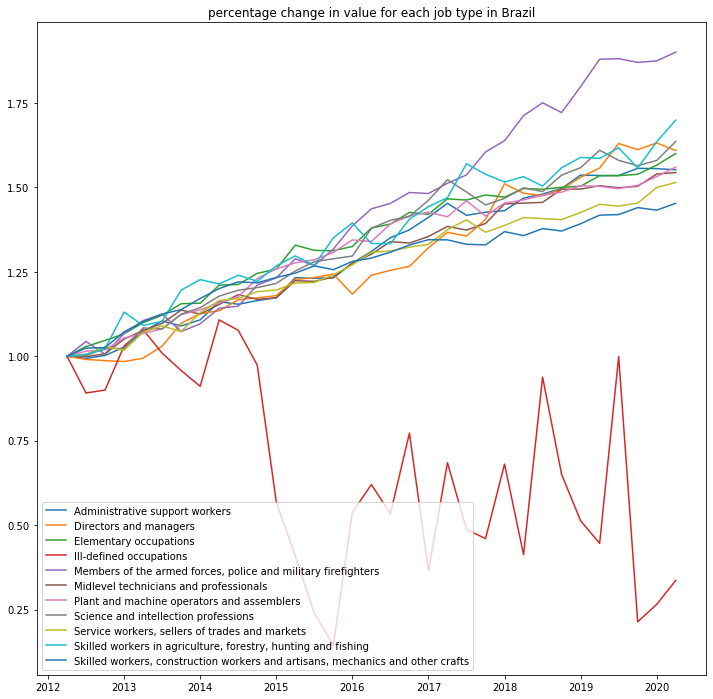

In [10]:
job_list = t2.job_type.unique()
plt.figure(figsize = (12,12))
for a in job_list:
    sub = t2[t2.job_type == a]
    plt.plot(sub.time_in_order,sub.value/sub.value.iloc[0])
plt.legend(job_list)
plt.title('percentage change in value for each job type in Brazil')

In [11]:
job_list

array(['Administrative support workers', 'Directors and managers',
       'Elementary occupations', 'Ill-defined occupations',
       'Members of the armed forces, police and military firefighters',
       'Midlevel technicians and professionals',
       'Plant and machine operators and assemblers',
       'Science and intellection professions',
       'Service workers, sellers of trades and markets',
       'Skilled workers in agriculture, forestry, hunting and fishing',
       'Skilled workers, construction workers and artisans, mechanics and other crafts'],
      dtype=object)

Text(0.5, 1.0, 'percentage change in value for each state in Brazil')

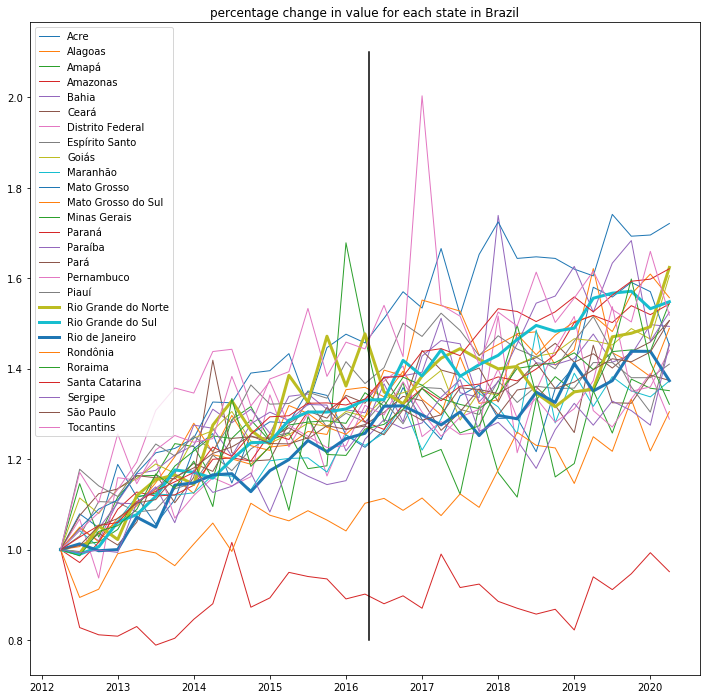

In [12]:
t1_1 = t1[t1.job_type == job_list[-1]]
t3 = pd.DataFrame(t1_1.groupby(['state','time_in_order'])['value'].sum()).reset_index()
state_list = t3.state.unique()
plt.figure(figsize = (12,12))
for a in state_list:
    sub = t3[t3.state == a]
    lw = 1
    if a[:3] == 'Rio':
        lw = 3
    plt.plot(sub.time_in_order,sub.value/sub.value.iloc[0],linewidth = lw) #
plt.legend(state_list)
plt.plot([2016.3,2016.3],[0.8,2.1],color = 'black') 
plt.title('percentage change in value for each state in Brazil')

Text(0.5, 1.0, 'percentage change in value for each state in Brazil')

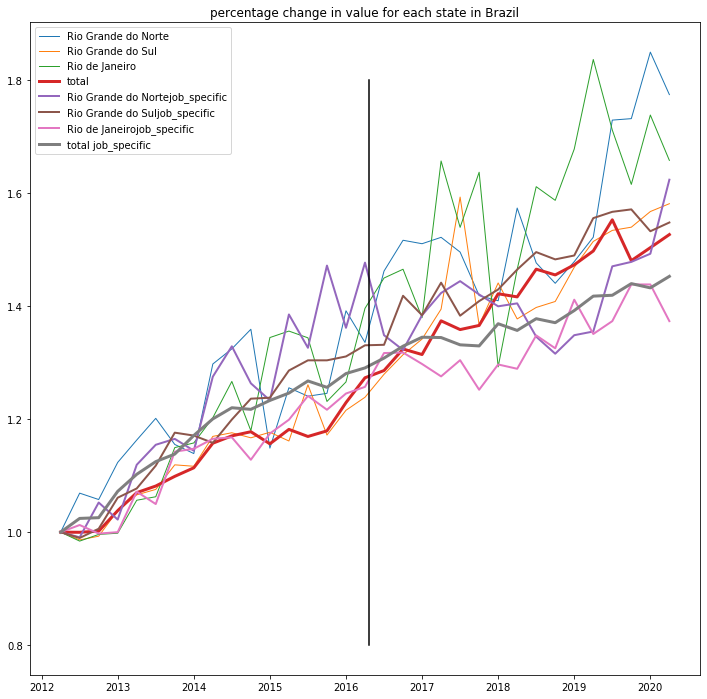

In [13]:
t3 = pd.DataFrame(t1.groupby(['state','time_in_order'])['value'].sum()).reset_index()
plt.figure(figsize = (12,12))
legend_list = []
for a in state_list:
    sub = t3[t3.state == a]
    lw = 1
    if a[:3] == 'Rio':
        #lw = 3
        plt.plot(sub.time_in_order,sub.value/sub.value.iloc[0],linewidth = lw) #
        legend_list.append(a)
t4 = pd.DataFrame(t3.groupby('time_in_order')['value'].sum()).reset_index()
plt.plot(t4.time_in_order,t4.value/t4.value.iloc[0],linewidth = 3) #
legend_list.append('total')

t3 = pd.DataFrame(t1_1.groupby(['state','time_in_order'])['value'].sum()).reset_index()
for a in state_list:
    sub = t3[t3.state == a]
    lw = 1
    if a[:3] == 'Rio':
        #lw = 3
        plt.plot(sub.time_in_order,sub.value/sub.value.iloc[0],linewidth = lw+1) #
        legend_list.append(a+'job_specific')
t4 = pd.DataFrame(t3.groupby('time_in_order')['value'].sum()).reset_index()
plt.plot(t4.time_in_order,t4.value/t4.value.iloc[0],linewidth = 3) #
legend_list.append('total job_specific')


plt.plot([2016.3,2016.3],[0.8,1.8],color = 'black') 
plt.legend(legend_list)

plt.title('percentage change in value for each state in Brazil')

### Vancouver data
vancouver_tourism_indicators: real_GDP??? consumption_taxes可以用来看消费程度？有个employment by region

vancouver_employment_by_industry，region_codes： 有人数，可以看出人数变化，如果不linear 可能intersting

vancouver_business_size，可以看出business 各个industry数量/员工数量。但unknown很烦不知道怎么处理

vancouver_small_business_by_region结合上一个？看small business的变化

vancouver_visits：直观简洁只有year，month，count，做一下EDA

vancouver_room_revenues_2000_2010/2019 emmmm这两个还不太一样。。。




In [14]:
#vancouver datasets
for ind in range(len(vancouver_files)):
    l3 = pd.read_csv('{0}Vancouver/{1}.csv'.format(pathh,vancouver_files[ind]))
    print(ind,vancouver_files[ind])
    display(l3.head(3))

0 vancouver_turism_indicators


year revenue    GDP real_GDP  implicit_price_index  employment  \
0  2000   9,350  4,679    5,085                  91.4        96.7   
1  2001   9,448  4,857    5,102                  94.6       104.2   
2  2002   9,754  4,931    5,147                  95.2       104.2   

  wages_and_salaries consumption_taxes employment_vcm employment_vi  \
0              2,801               855         60,600        15,300   
1              2,968               861         67,300        15,700   
2              2,927               943         64,800        17,700   

  employment_to employment_nbc employment_bcr employment_ccc  
0         9,500          5,400          3,900          2,000  
1         9,300          5,400          4,500          2,100  
2        10,400          5,300          4,200          1,800

1 vancouver_employment_by_industry


year           industry_code      value
0  1987.0                       0  1377700.0
1  1987.0    11,21,22,23,31,32,33   333800.0
2  1987.0  1100  1129, 1151  1152    31700.0

2 vancouver_business_size


year region_code                     business_type unknown one_to_4  \
0  1999        DR01  Agric., Forestry, Fishing & Hunt   1,227      954   
1  1999        DR01       Mining & Oil & Gas Extract.      59       40   
2  1999        DR01                         Utilities      13        7   

  five_to_9 ten_to_19 twenty_to_49  fifty_to_199  two_hundred_plus  
0       219       142           99          44.0               7.0  
1         7         3          NaN           4.0               1.0  
2         4         4            2           3.0               1.0

3 vancouver_small_business_by_region


year region_code   value
0  2007        DR01  79,200
1  2008        DR01  80,300
2  2009        DR01  82,400

4 vancouver_visits


year  month   value
0  1994      1  320101
1  1994      2  315660
2  1994      3  429018

5 vancouver_room_revenues_2000_2010


year  month region_code acc_type     revenue properties   rooms
0  2000      1        DR01      TOT   7582000.0        345  14,092
1  2000      2        DR01      TOT  10090000.0        374  14,335
2  2000      3        DR01      TOT  13198000.0        401  14,819

6 vancouver_room_revenues_2010_2019


year  month region_code     region_name  revenue
0  2010.0    1.0        UC39  Campbell River      NaN
1  2010.0    2.0        UC39  Campbell River      NaN
2  2010.0    3.0        UC39  Campbell River      NaN

7 region_codes


region_code             region_name                    Composition  \
0        DR01  Vancouver Island/Coast  RD 17, 19, 21, 23, 25, 43, 45   
1        DR02      Mainland/Southwest              RD 09, 15, 29, 31   
2        DR03       Thompson/Okanagan          RD 07, 33, 35, 37, 39   

  Description  
0         NaN  
1         NaN  
2         NaN

In [15]:
l3_0 = pd.read_csv('{0}Vancouver/{1}.csv'.format(pathh,vancouver_files[-1]))
print(len(l3))
l3_0

74


region_code             region_name                    Composition  \
0         DR01  Vancouver Island/Coast  RD 17, 19, 21, 23, 25, 43, 45   
1         DR02      Mainland/Southwest              RD 09, 15, 29, 31   
..         ...                     ...                            ...   
72        UC40                  Tofino                            NaN   
73        UC41                Ucluelet                            NaN   

                          Description  
0                                 NaN  
1                                 NaN  
..                                ...  
72    District Municipality of Tofino  
73  District Municipality of Ucluelet  

[74 rows x 4 columns]

In [16]:
ind = 1
l3 = pd.read_csv('{0}Vancouver/{1}.csv'.format(pathh,vancouver_files[ind]))
print(len(l3))
l3['Composition'] = 'RD ' + l3['industry_code']

4653


In [17]:
t1

year quarter                 job_type             state   value  \
0     2012      Q1   Directors and managers          Rondônia  2232.0   
1     2012      Q1   Directors and managers              Acre  3048.0   
...    ...     ...                      ...               ...     ...   
9799  2020      Q1  Ill-defined occupations             Goiás  1000.0   
9800  2020      Q1  Ill-defined occupations  Distrito Federal  2611.0   

      time_in_order  
0           2012.25  
1           2012.25  
...             ...  
9799        2020.25  
9800        2020.25  

[9801 rows x 6 columns]

Text(0.5, 1.0, 'percentage change in value for each job type in Brazil')

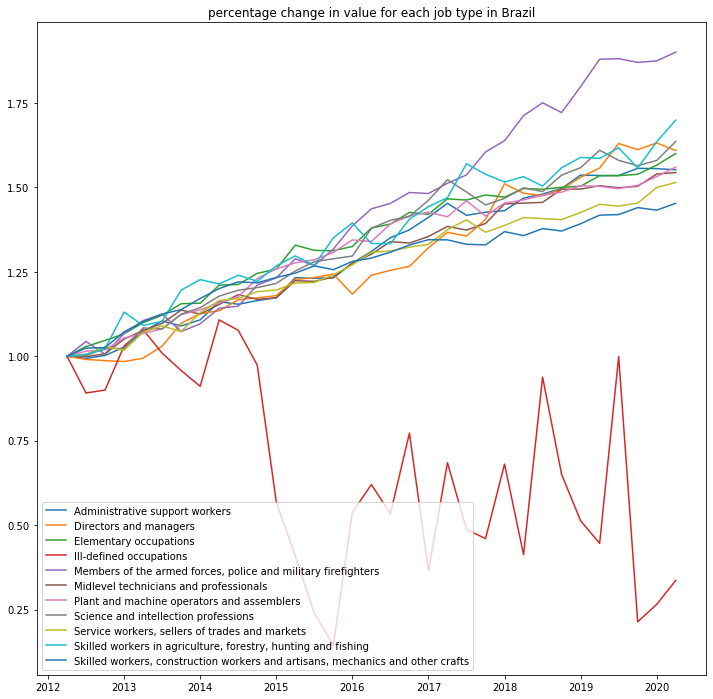

In [18]:
t2 = pd.DataFrame(t1.groupby(['job_type','time_in_order'])['value'].sum()).reset_index()
job_list = t2.job_type.unique()
plt.figure(figsize = (12,12))
for a in job_list:
    sub = t2[t2.job_type == a]
    plt.plot(sub.time_in_order,sub.value/sub.value.iloc[0])
plt.legend(job_list)
plt.title('percentage change in value for each job type in Brazil')

In [19]:
Vancouver_visits = pd.read_csv('{0}Vancouver/{1}.csv'.format(pathh,'Vancouver_visits'))
Vancouver_visits['time_in_order'] = Vancouver_visits['year'] + pd.Series([int(a)/13 for a in Vancouver_visits['month']])

In [20]:
Vancouver_visits

year  month   value  time_in_order
0    1994      1  320101    1994.076923
1    1994      2  315660    1994.153846
..    ...    ...     ...            ...
298  2018     11  679496    2018.846154
299  2018     12  838728    2018.923077

[300 rows x 4 columns]

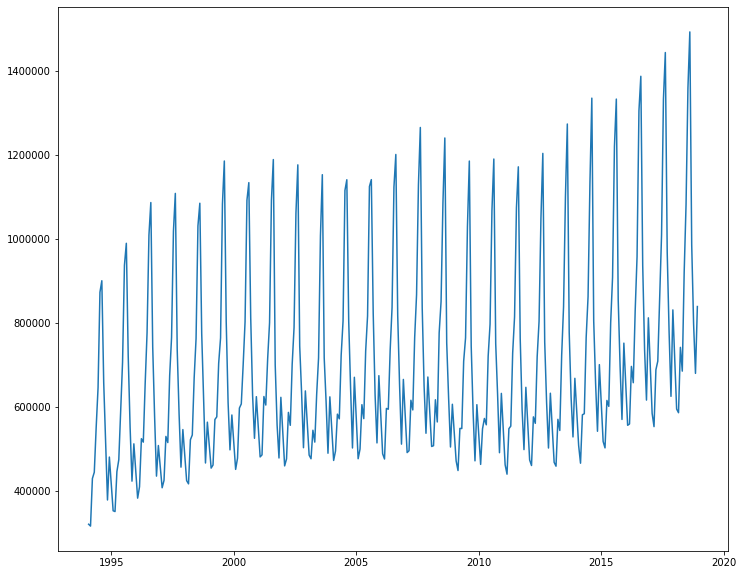

In [21]:
plt.figure(figsize = (12,10))
plt.plot(Vancouver_visits.time_in_order,Vancouver_visits.value)

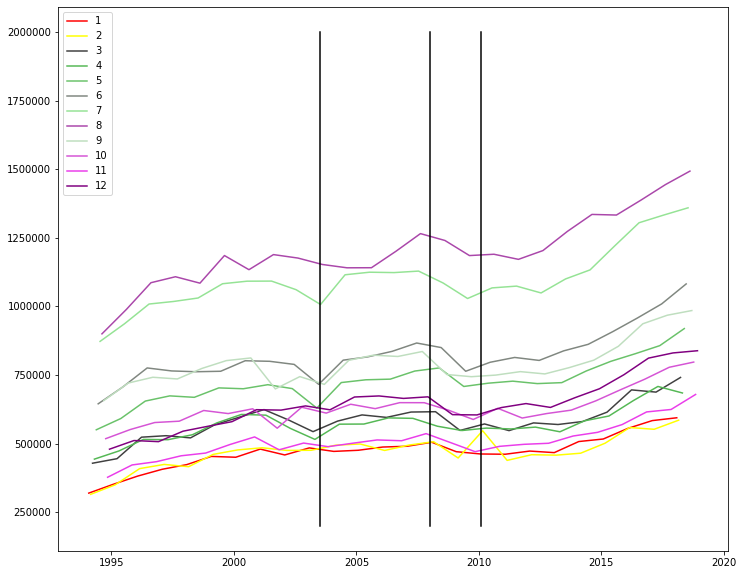

In [22]:
plt.figure(figsize = (12,10))
for i in np.arange(1,13):
    cond = Vancouver_visits.month == i
    if i == 1:
        plt.plot(Vancouver_visits[cond].time_in_order,Vancouver_visits[cond].value,color ='red')
    elif i == 12:
        plt.plot(Vancouver_visits[cond].time_in_order,Vancouver_visits[cond].value,color ='purple')
    elif i == 2:
        plt.plot(Vancouver_visits[cond].time_in_order,Vancouver_visits[cond].value,color ='yellow')
   
    else:
        plt.plot(Vancouver_visits[cond].time_in_order,Vancouver_visits[cond].value,color = (i/12,np.random.randint(100)/100,i/12))
    
plt.legend(list(np.arange(1,13)))
plt.plot([2008,2008],[2e5,2e6],color = 'black')
plt.plot([2003.5,2003.5],[2e5,2e6],color = 'black')
plt.plot([2010+1/12,2010+1/12],[2e5,2e6],color = 'black')


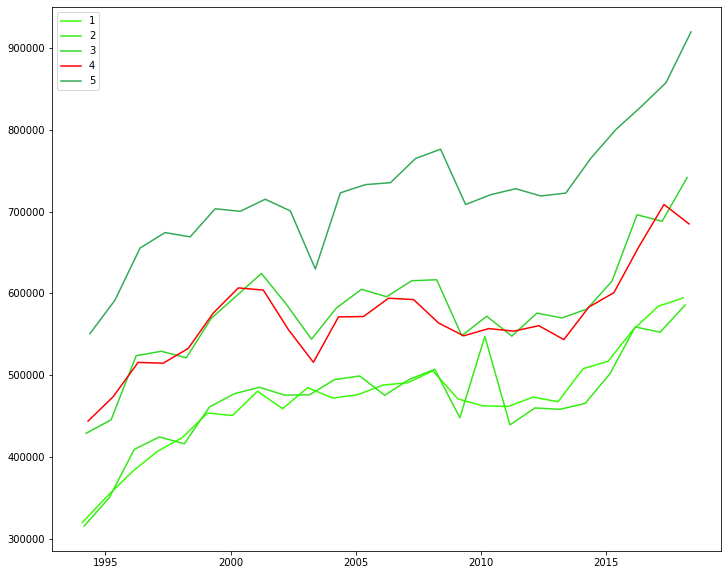

In [23]:
plt.figure(figsize = (12,10))
for i in np.arange(0,5):
    cond = Vancouver_visits.month == i+1
    if i == 3:
        plt.plot(Vancouver_visits[cond].time_in_order,Vancouver_visits[cond].value,color ='red')
    else:
        plt.plot(Vancouver_visits[cond].time_in_order,Vancouver_visits[cond].value,color = (0.2,1-i/12,i/12))
    
plt.legend(list(np.arange(1,12)))

In [24]:
year_mean = pd.DataFrame(Vancouver_visits.groupby('year')['value'].mean()).reset_index()
Vancouver_visits2 = Vancouver_visits.merge(year_mean,how = 'left',left_on = 'year',right_on = 'year')

In [25]:
s1994_set = Vancouver_visits2[(Vancouver_visits2.year == 1996)][['month','value_x']]
Vancouver_visits2 = Vancouver_visits2.merge(s1994_set,how = 'left',left_on = 'month',right_on = 'month')
Vancouver_visits2 = Vancouver_visits2.rename(columns = {'value_x_x':'value','value_y':'year_mean','value_x_y':'value1994'})
Vancouver_visits2['perc'] = Vancouver_visits2['value'] / Vancouver_visits2['value1994']



In [26]:
Vancouver_visits2

year  month   value  time_in_order      year_mean  value1994      perc
0    1994      1  320101    1994.076923  542633.833333     382223  0.837472
1    1994      2  315660    1994.153846  542633.833333     409363  0.771100
..    ...    ...     ...            ...            ...        ...       ...
298  2018     11  679496    2018.846154  896760.333333     434704  1.563123
299  2018     12  838728    2018.923077  896760.333333     507566  1.652451

[300 rows x 7 columns]

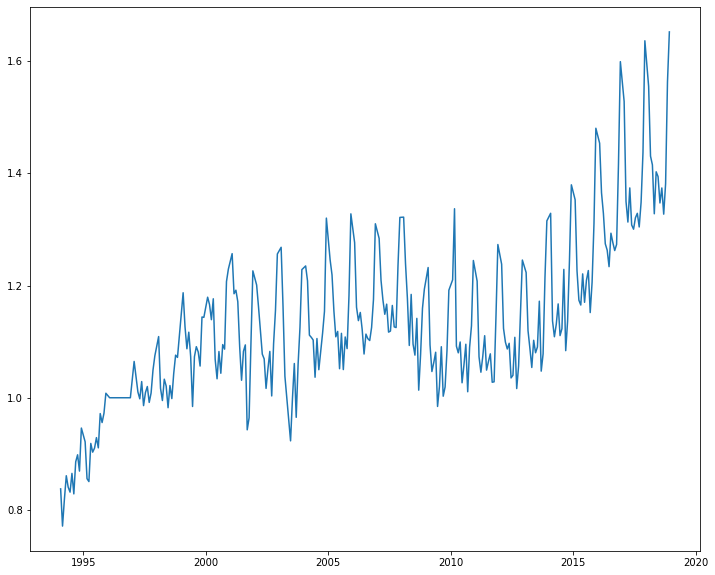

In [27]:
plt.figure(figsize = (12,10))
plt.plot(Vancouver_visits2.time_in_order,Vancouver_visits2.perc)

In [28]:
Vancouver_visits3 = Vancouver_visits2.copy()
Vancouver_visits3 = Vancouver_visits3[(Vancouver_visits3.year>=1996)&(Vancouver_visits3.year<2018)]


In [29]:
Vancouver_visits4 = pd.DataFrame()
for i in np.arange(1,13):
    sub = Vancouver_visits3[Vancouver_visits3.month == i]
    sub['prev_val'] = np.NaN
    sub['prev_val'][1:] =  sub['value'][:-1].tolist()
    Vancouver_visits4 = pd.concat([Vancouver_visits4,sub])
    


In [30]:
Vancouver_visits4 = Vancouver_visits4[Vancouver_visits4.year != 1996]
Vancouver_visits4['prec_increase'] = Vancouver_visits4['value']  / Vancouver_visits4['prev_val'] 

Vancouver_visits4 = Vancouver_visits4.sort_values('time_in_order')


In [31]:
Vancouver_visits4

year  month   value  time_in_order      year_mean  value1994      perc  \
36   1997      1  406973    1997.076923  646749.500000     382223  1.064753   
37   1997      2  424595    1997.153846  646749.500000     409363  1.037209   
..    ...    ...     ...            ...            ...        ...       ...   
286  2017     11  624787    2017.846154  864895.333333     434704  1.437270   
287  2017     12  830702    2017.923077  864895.333333     507566  1.636638   

     prev_val  prec_increase  
36   382223.0       1.064753  
37   409363.0       1.037209  
..        ...            ...  
286  615825.0       1.014553  
287  811811.0       1.023270  

[252 rows x 9 columns]

Text(0.5, 1.0, 'Percentage increase in Visits in Vancouver, compared to the same month in 1996')

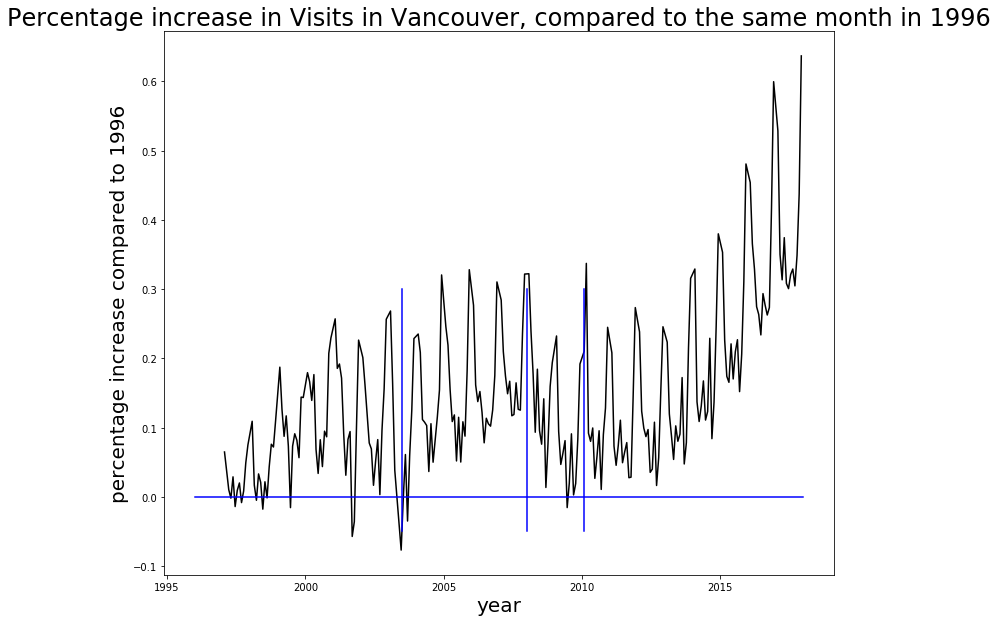

In [32]:
plt.figure(figsize = (12,10))
plt.plot(Vancouver_visits4.time_in_order,Vancouver_visits4.perc -1,color = 'black')

plt.plot([2008,2008],[-.05,0.3],color = 'blue')
plt.plot([2003.5,2003.5],[-.05,0.3],color = 'blue')
plt.plot([2010+1/12,2010+1/12],[-.05,0.3],color = 'blue')
plt.plot([1996,2018],[0,0],color = 'blue')

plt.xlabel('year',fontsize = 20)
plt.ylabel('percentage increase compared to 1996',fontsize = 20)
plt.title('Percentage increase in Visits in Vancouver, compared to the same month in 1996',fontsize = 24)



Text(0.5, 1.0, 'Percentage increase in Visits in Vancouver, compared to the same month in previous year')

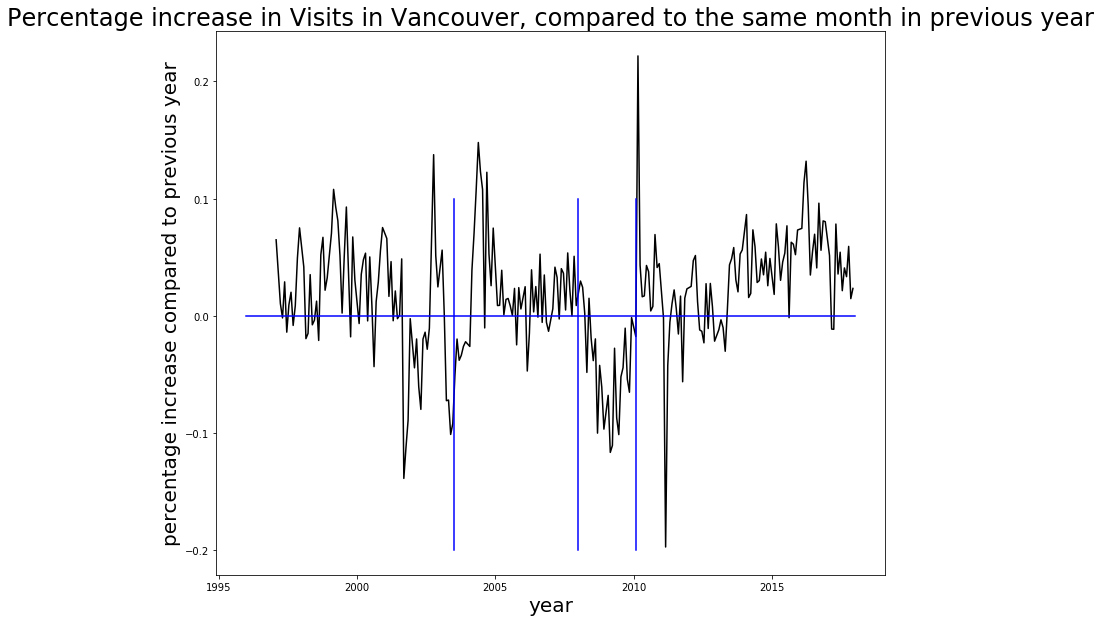

In [33]:
plt.figure(figsize = (12,10))
plt.plot(Vancouver_visits4.time_in_order,Vancouver_visits4.prec_increase -1,color = 'black')

plt.plot([2008,2008],[-.2,0.1],color = 'blue')
plt.plot([2003.5,2003.5],[-.2,0.1],color = 'blue')
plt.plot([2010+1/12,2010+1/12],[-.2,0.1],color = 'blue')
plt.plot([1996,2018],[0,0],color = 'blue')

plt.xlabel('year',fontsize = 20)
plt.ylabel('percentage increase compared to previous year',fontsize = 20)
plt.title('Percentage increase in Visits in Vancouver, compared to the same month in previous year',fontsize = 24)



In [34]:
Vancouver_visits

year  month   value  time_in_order
0    1994      1  320101    1994.076923
1    1994      2  315660    1994.153846
..    ...    ...     ...            ...
298  2018     11  679496    2018.846154
299  2018     12  838728    2018.923077

[300 rows x 4 columns]

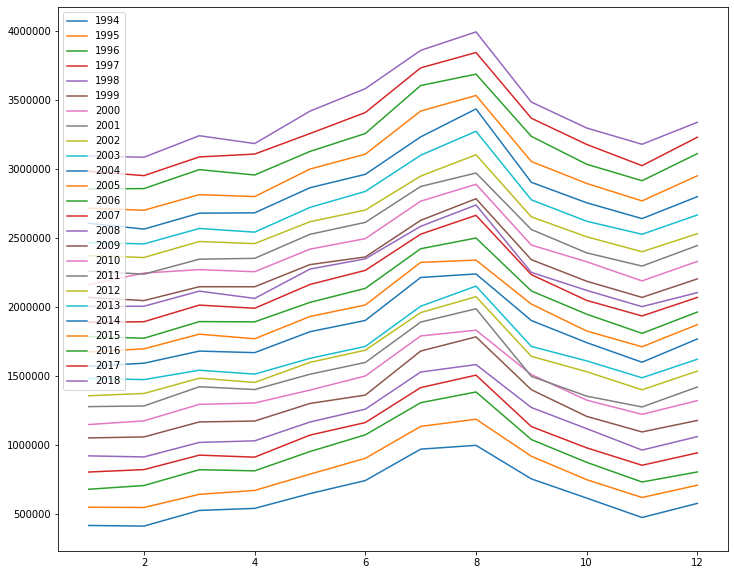

In [35]:
plt.figure(figsize = (12,10))
for i in np.arange(1994,2019):
    cond = Vancouver_visits.year == i
    plt.plot(Vancouver_visits[cond].month,Vancouver_visits[cond].value+(i-1993)*1e5)
    
plt.legend(list(np.arange(1994,2019)))


In [36]:
vancouver_files

['vancouver_turism_indicators',
 'vancouver_employment_by_industry',
 'vancouver_business_size',
 'vancouver_small_business_by_region',
 'vancouver_visits',
 'vancouver_room_revenues_2000_2010',
 'vancouver_room_revenues_2010_2019',
 'region_codes']

In [37]:
vrv_00 = pd.read_csv('{0}Vancouver/{1}.csv'.format(pathh,vancouver_files[5]))
vrv_00


year  month region_code acc_type     revenue properties   rooms
0      2000      1        DR01      TOT   7582000.0        345  14,092
1      2000      2        DR01      TOT  10090000.0        374  14,335
...     ...    ...         ...      ...         ...        ...     ...
58210  2010      5        BC00       MI   8490000.0        286  10,555
58211  2010      6        BC00       MI  11625000.0        367  11,873

[58212 rows x 7 columns]

In [38]:
vrv_00 = pd.read_csv('{0}Vancouver/{1}.csv'.format(pathh,vancouver_files[5]))
vrv_10 = pd.read_csv('{0}Vancouver/{1}.csv'.format(pathh,vancouver_files[6]))
region_codes = pd.read_csv('{0}Vancouver/{1}.csv'.format(pathh,vancouver_files[7]))

vrv_00 = vrv_00.merge(region_codes[['region_name','region_code']],how = 'left',left_on = 'region_code',right_on = 'region_code')

vrv_00.properties = [float(str(a).replace(',','')) for a in vrv_00.properties]
vrv_00.rooms = [float(str(a).replace(',','')) for a in vrv_00.rooms]
vrv_00.revenue = [float(str(a).replace(',','')) for a in vrv_00.revenue]
vrv_10.revenue = [float(str(a).replace(',','')) for a in vrv_10.revenue]

vrv_00 = pd.DataFrame(vrv_00[vrv_00.acc_type == 'TOT'].groupby(['year','month','region_code','region_name']).agg(revenue = ('revenue','sum'),
                                                                properties = ('properties','sum'),
                                                                rooms = ('rooms','sum'))).reset_index()

vrv_10['properties'] = np.NaN
vrv_10['rooms'] = np.NaN
vrv = pd.concat([vrv_00,vrv_10])


In [39]:
van_regions = ['Greater Vancouver','Downtown Vancouver','Other Vancouver','Vancouver','North Vancouver']
#10年前和年后不同scale
vrv['in_v'] = [True if a in van_regions else False for a in vrv.region_name]



In [40]:
vrv_grouped = pd.DataFrame(vrv.groupby(['year','month','in_v'])['revenue'].sum()).reset_index()
vrv_grouped['time_in_order'] = vrv_grouped['year'] + pd.Series([a/12 for a in vrv_grouped['month']])

In [41]:
vrv_van = pd.DataFrame()
vrv_van_pre = vrv_grouped[vrv_grouped.in_v == True]
for m in vrv_van_pre.month.unique():
    sub = vrv_van_pre[vrv_van_pre.month == m]
    sub['prev_val'] = np.NaN
    sub['prev_val'][1:] =  sub['revenue'][:-1].tolist()
    vrv_van = pd.concat([vrv_van,sub])
vrv_van['prec_increase'] = vrv_van['revenue'] / vrv_van['prev_val']
vrv_van = vrv_van.sort_values('time_in_order')
vrv_nonvan = pd.DataFrame()

vrv_nonvan_pre = vrv_grouped[vrv_grouped.in_v == False]
for m in vrv_nonvan_pre.month.unique():
    sub = vrv_nonvan_pre[vrv_nonvan_pre.month == m]
    sub['prev_val'] = np.NaN
    sub['prev_val'][1:] =  sub['revenue'][:-1].tolist()
    vrv_nonvan = pd.concat([vrv_nonvan,sub])
vrv_nonvan['prec_increase'] = vrv_nonvan['revenue'] / vrv_nonvan['prev_val']
vrv_nonvan = vrv_nonvan.sort_values('time_in_order')

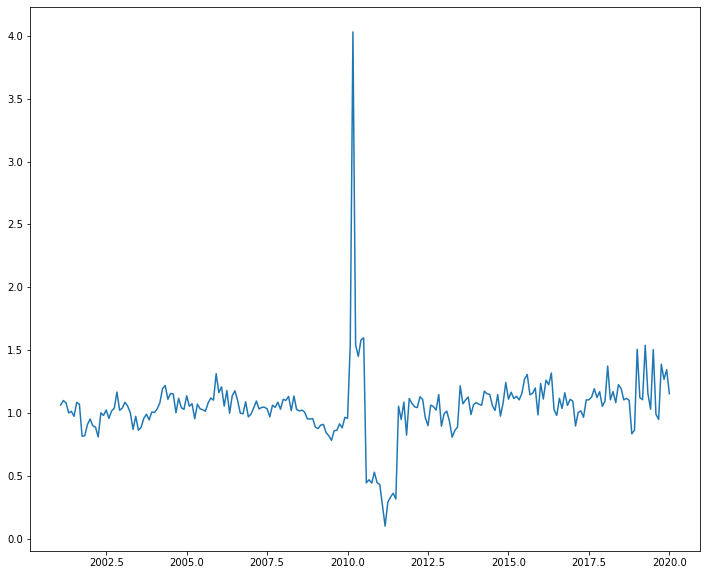

In [42]:
plt.figure(figsize = (12,10))

plt.plot(vrv_van.time_in_order,vrv_van.prec_increase)


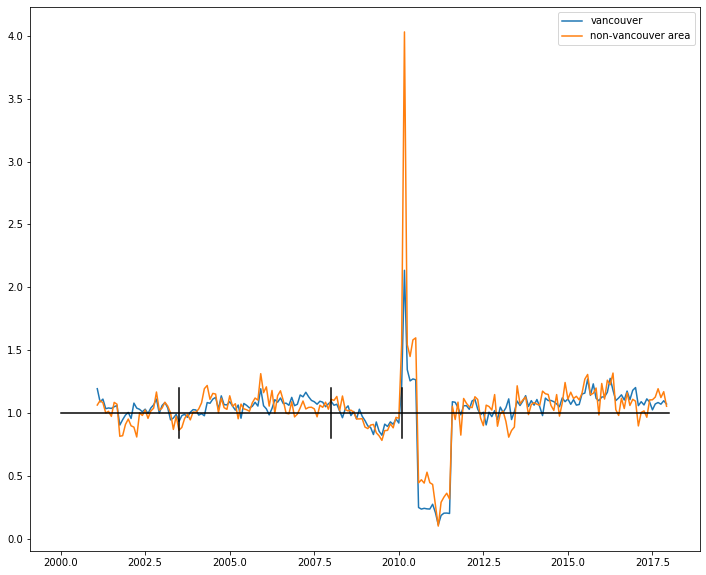

In [43]:

plt.figure(figsize = (12,10))
plt.plot(vrv_nonvan.time_in_order[vrv_nonvan.time_in_order<2018],vrv_nonvan.prec_increase[vrv_nonvan.time_in_order<2018])
plt.plot(vrv_van.time_in_order[vrv_van.time_in_order<2018],vrv_van.prec_increase[vrv_van.time_in_order<2018])
plt.legend(['vancouver','non-vancouver area'])


plt.plot([2008,2008],[.8,1.2],color = 'black')
plt.plot([2003.5,2003.5],[.8,1.2],color = 'black')
plt.plot([2010+1/12,2010+1/12],[.8,1.2],color = 'black')
plt.plot([2000,2018],[1,1],color = 'black')




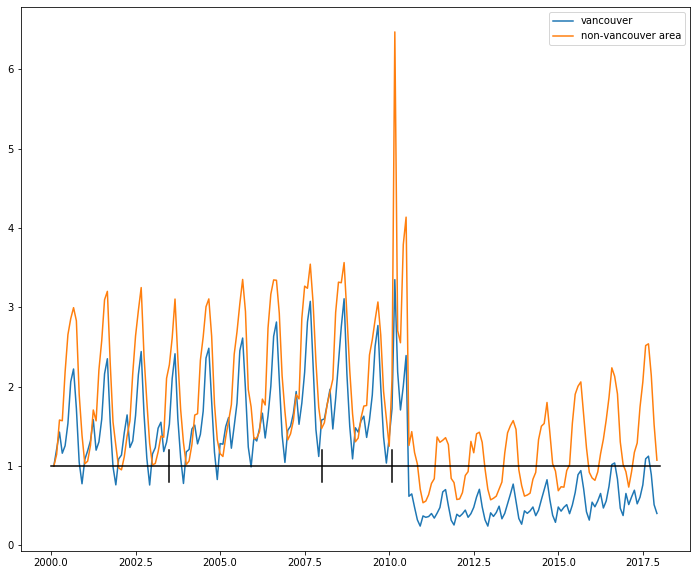

In [44]:
plt.figure(figsize = (12,10))
plt.plot(vrv_nonvan.time_in_order[vrv_nonvan.time_in_order<2018],vrv_nonvan.revenue[vrv_nonvan.time_in_order<2018]/vrv_nonvan.revenue.iloc[0])
plt.plot(vrv_van.time_in_order[vrv_van.time_in_order<2018],vrv_van.revenue[vrv_van.time_in_order<2018]/vrv_van.revenue.iloc[0])
plt.legend(['vancouver','non-vancouver area'])


plt.plot([2008,2008],[.8,1.2],color = 'black')
plt.plot([2003.5,2003.5],[.8,1.2],color = 'black')
plt.plot([2010+1/12,2010+1/12],[.8,1.2],color = 'black')
plt.plot([2000,2018],[1,1],color = 'black')


In [45]:
codes = ['DR01','RD15','UC01','UC02','RD15']
for a in codes:
    sub = vrv[vrv.region_code == a]
    print(a,':')
    print(sub.region_name.unique())
    print(sub.year.unique())

    

DR01 :
['Vancouver Island/Coast']
[2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010.]
RD15 :
['Greater Vancouver' 'Surrey' 'Vancouver' 'Langley' 'North Vancouver']
[2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011.
 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019.]
UC01 :
['Downtown Vancouver']
[2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010.]
UC02 :
['Other Vancouver']
[2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010.]
RD15 :
['Greater Vancouver' 'Surrey' 'Vancouver' 'Langley' 'North Vancouver']
[2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011.
 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019.]


In [46]:
van_regions = ['Greater Vancouver', 'Surrey' ,'Vancouver' ,'Langley', 'North Vancouver']
for a in van_regions:
    sub = vrv[vrv.region_name == a]
    #print(len(sub))
    display(sub)


year  month region_code        region_name     revenue  properties  \
13    2000.0    1.0        RD15  Greater Vancouver  28188000.0       235.0   
84    2000.0    2.0        RD15  Greater Vancouver  32596000.0       231.0   
...      ...    ...         ...                ...         ...         ...   
8817  2010.0    5.0        RD15  Greater Vancouver  72301000.0       230.0   
8888  2010.0    6.0        RD15  Greater Vancouver  77472000.0       243.0   

        rooms  in_v  
13    26122.0  True  
84    26240.0  True  
...       ...   ...  
8817  28402.0  True  
8888  28708.0  True  

[126 rows x 8 columns]

year  month region_code region_name    revenue  properties  rooms  \
1440  2010.0    1.0        RD15      Surrey  1517000.0         NaN    NaN   
1441  2010.0    2.0        RD15      Surrey  4817000.0         NaN    NaN   
...      ...    ...         ...         ...        ...         ...    ...   
1558  2019.0   11.0        RD15      Surrey        NaN         NaN    NaN   
1559  2019.0   12.0        RD15      Surrey        NaN         NaN    NaN   

       in_v  
1440  False  
1441  False  
...     ...  
1558  False  
1559  False  

[120 rows x 8 columns]

year  month region_code region_name     revenue  properties  rooms  \
1560  2010.0    1.0        RD15   Vancouver  25633000.0         NaN    NaN   
1561  2010.0    2.0        RD15   Vancouver  81611000.0         NaN    NaN   
...      ...    ...         ...         ...         ...         ...    ...   
1678  2019.0   11.0        RD15   Vancouver  55961000.0         NaN    NaN   
1679  2019.0   12.0        RD15   Vancouver  77687000.0         NaN    NaN   

      in_v  
1560  True  
1561  True  
...    ...  
1678  True  
1679  True  

[120 rows x 8 columns]

year  month region_code region_name    revenue  properties  rooms  \
1920  2010.0    1.0        RD15     Langley  1078000.0         NaN    NaN   
1921  2010.0    2.0        RD15     Langley  2577000.0         NaN    NaN   
...      ...    ...         ...         ...        ...         ...    ...   
2038  2019.0   11.0        RD15     Langley  2333000.0         NaN    NaN   
2039  2019.0   12.0        RD15     Langley  2042000.0         NaN    NaN   

       in_v  
1920  False  
1921  False  
...     ...  
2038  False  
2039  False  

[120 rows x 8 columns]

year  month region_code      region_name    revenue  properties  \
2040  2010.0    1.0        RD15  North Vancouver   943000.0         NaN   
2041  2010.0    2.0        RD15  North Vancouver  3552000.0         NaN   
...      ...    ...         ...              ...        ...         ...   
2158  2019.0   11.0        RD15  North Vancouver  1704000.0         NaN   
2159  2019.0   12.0        RD15  North Vancouver  3903000.0         NaN   

      rooms  in_v  
2040    NaN  True  
2041    NaN  True  
...     ...   ...  
2158    NaN  True  
2159    NaN  True  

[120 rows x 8 columns]

In [47]:
vrv.region_code.unique()

array(['DR01', 'DR02', 'DR03', 'DR04', 'DR05', 'DR06', 'DR07', 'DR08',
       'RD01', 'RD03', 'RD05', 'RD07', 'RD09', 'RD15', 'RD17', 'RD19',
       'RD21', 'RD23', 'RD25', 'RD27', 'RD29', 'RD31', 'RD33', 'RD35',
       'RD37', 'RD39', 'RD41', 'RD43', 'RD45', 'RD47', 'RD49', 'RD51+57',
       'RD53', 'RD55+59', 'UC01', 'UC02', 'UC04', 'UC06', 'UC07', 'UC08',
       'UC09', 'UC10', 'UC11', 'UC12', 'UC13', 'UC14', 'UC15', 'UC16',
       'UC17', 'UC18', 'UC19', 'UC20', 'UC21', 'UC22', 'UC24', 'UC25',
       'UC26', 'UC27', 'UC28', 'UC29', 'UC30', 'UC31', 'UC33', 'UC34',
       'UC35', 'UC36', 'UC37', 'UC38', 'UC39', 'UC40', 'UC41',
       'RD21, RD23, RD25', 'RD27, RD29', 'UC9'], dtype=object)

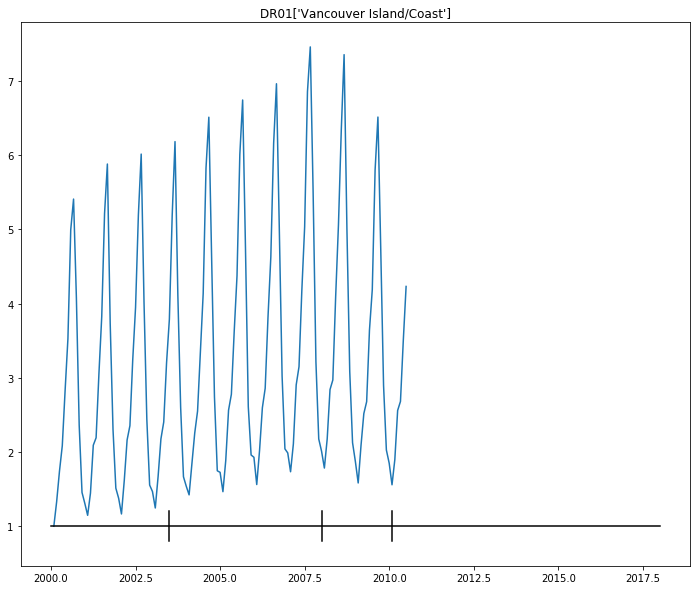

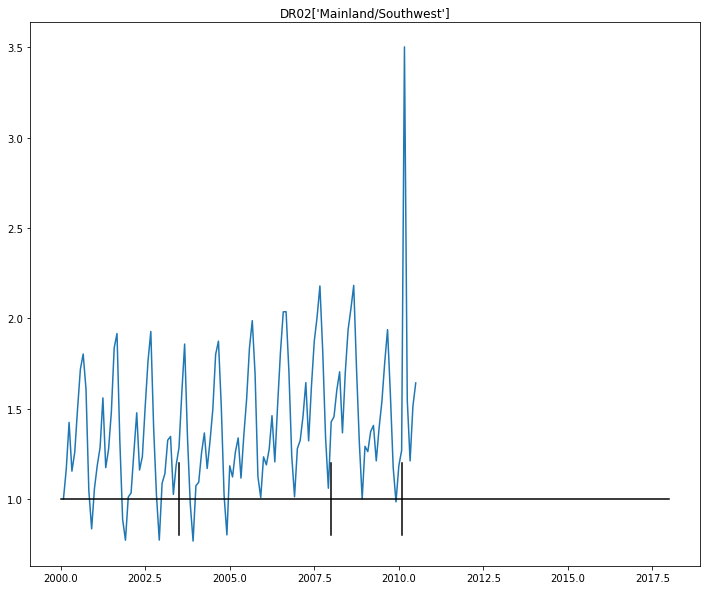

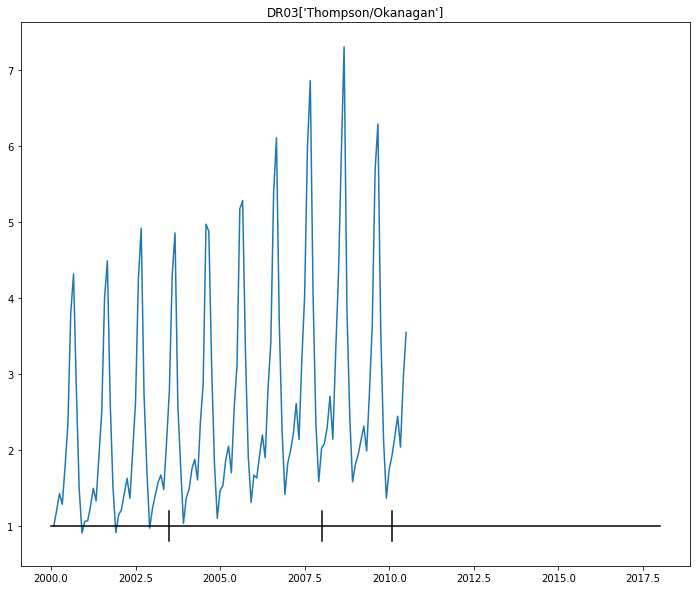

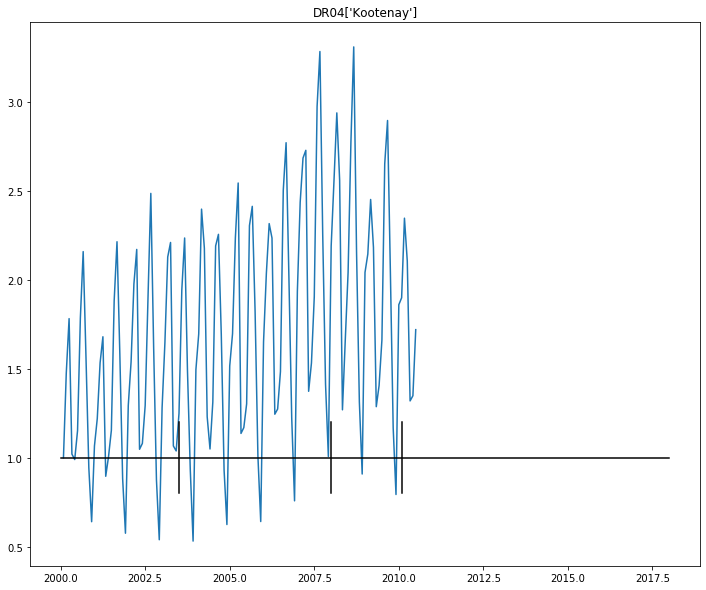

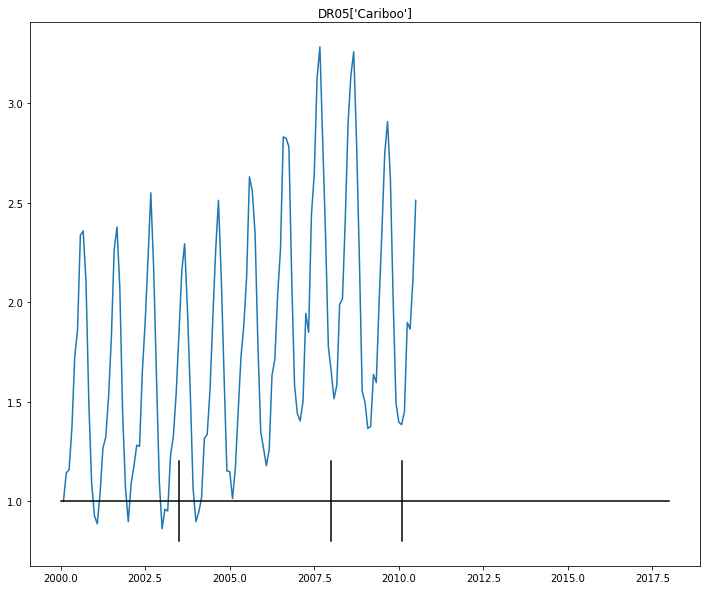

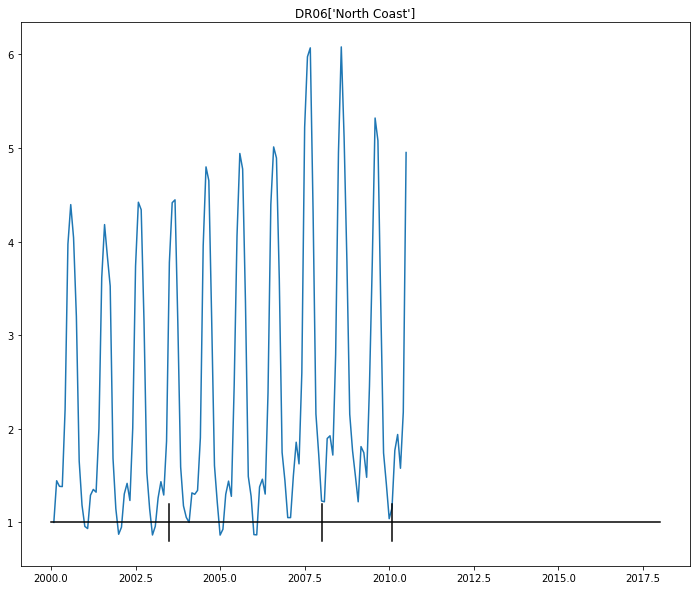

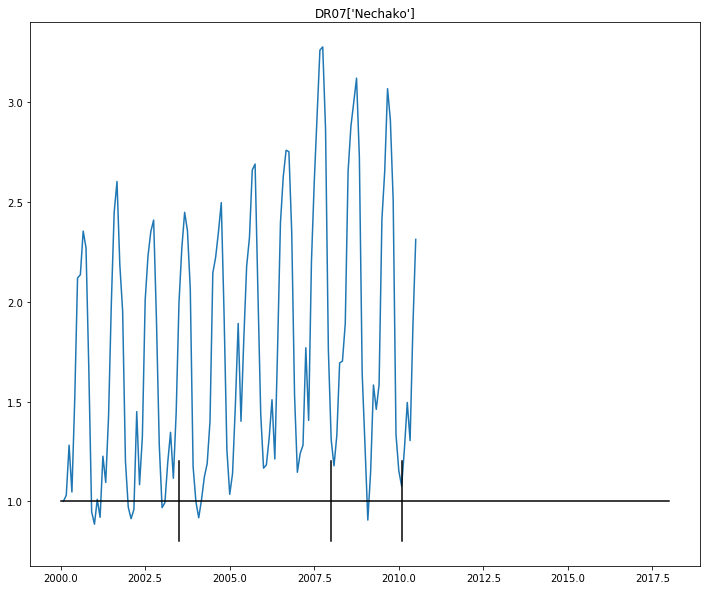

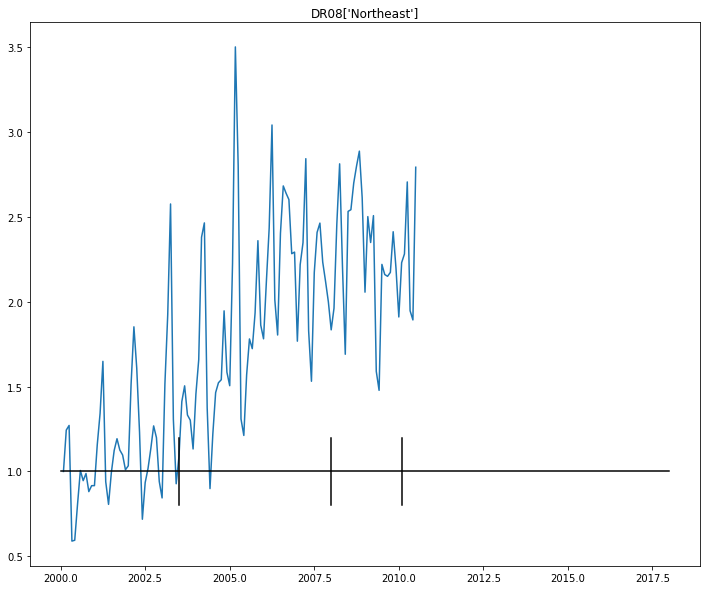

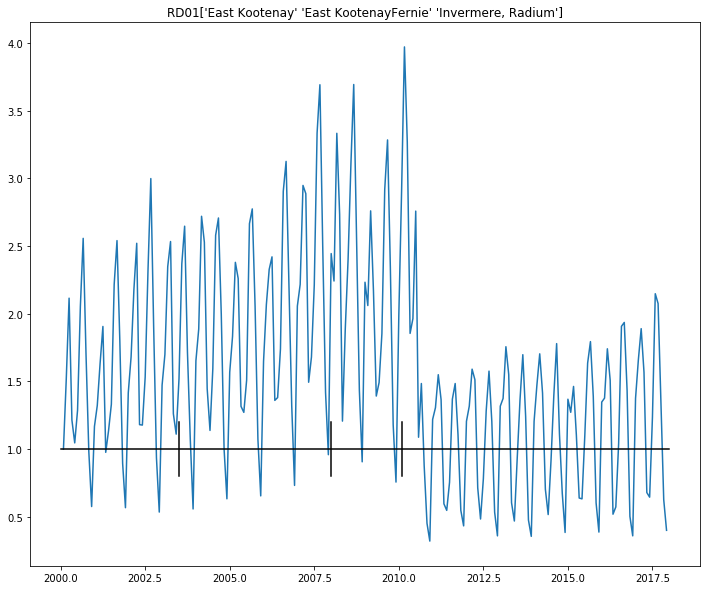

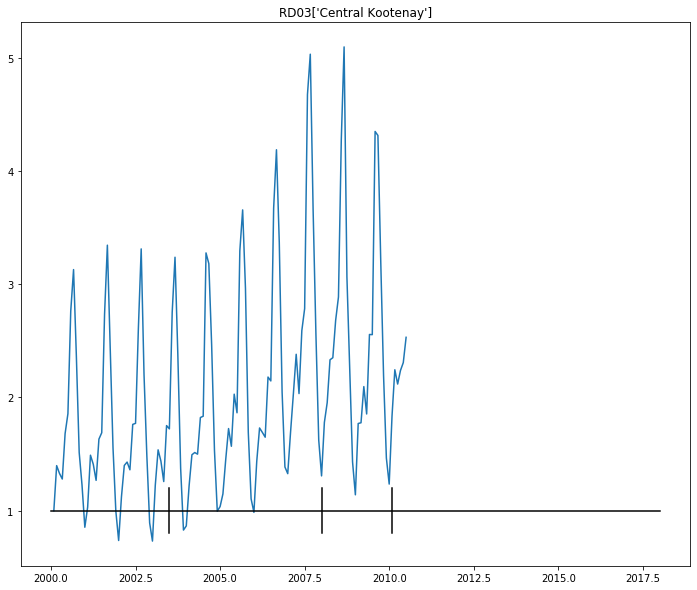

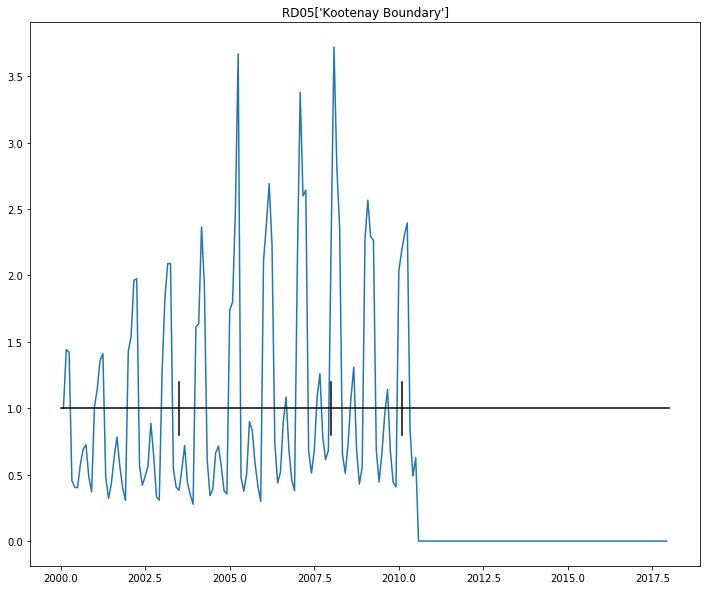

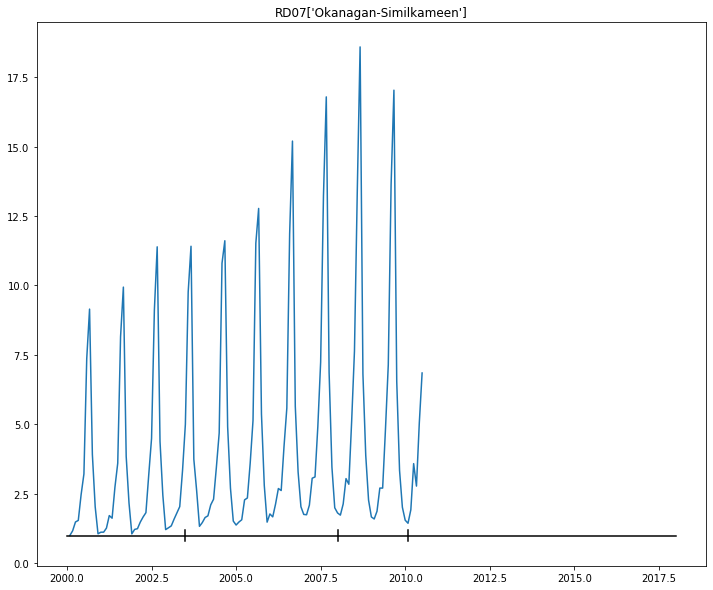

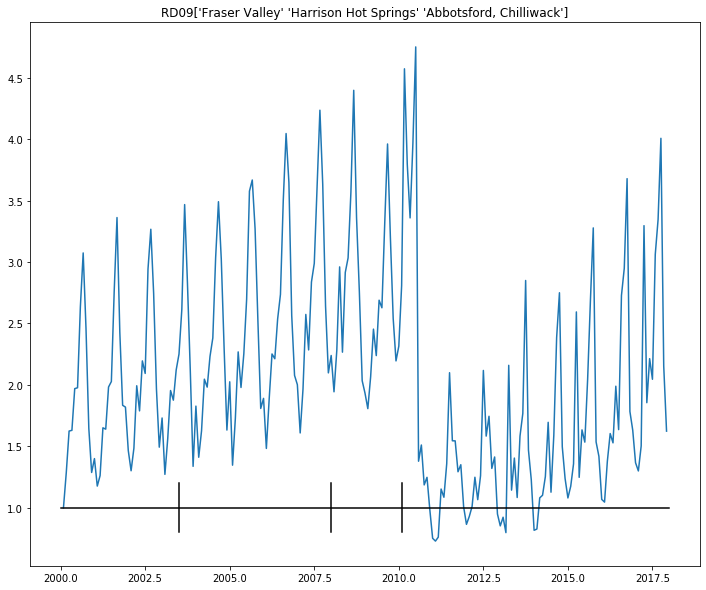

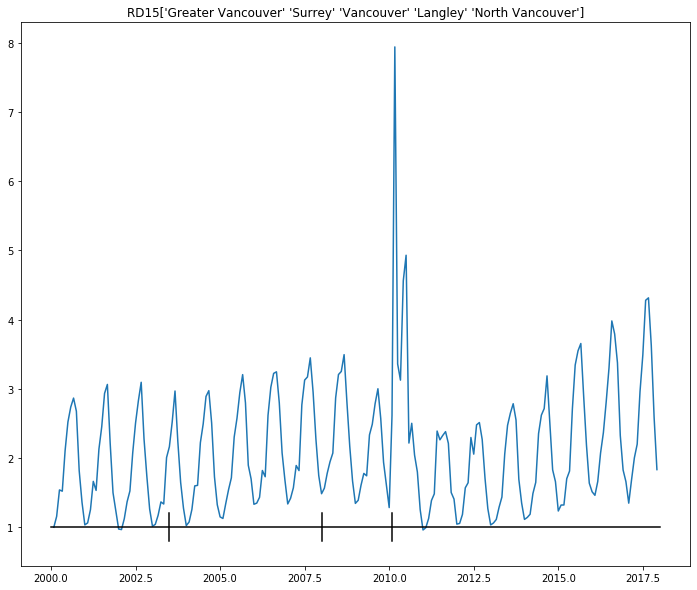

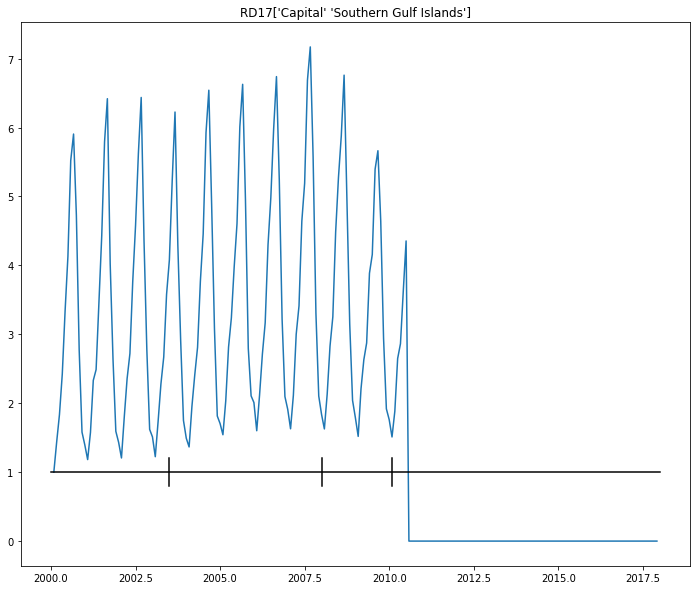

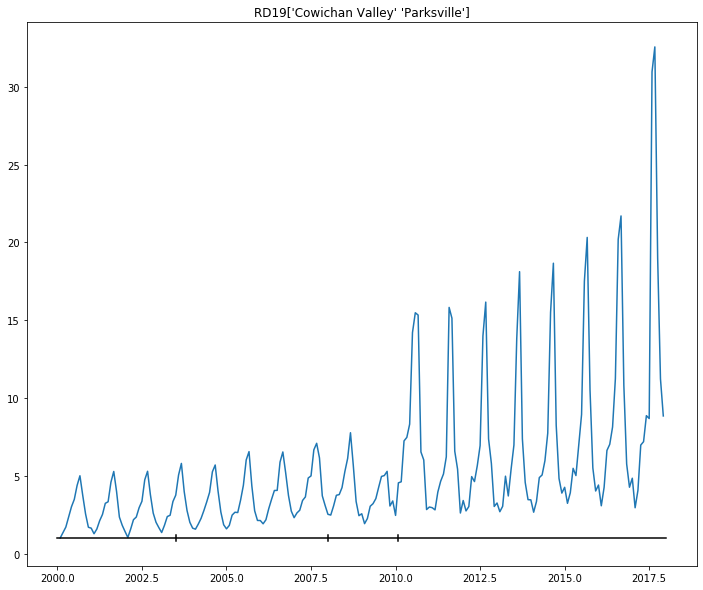

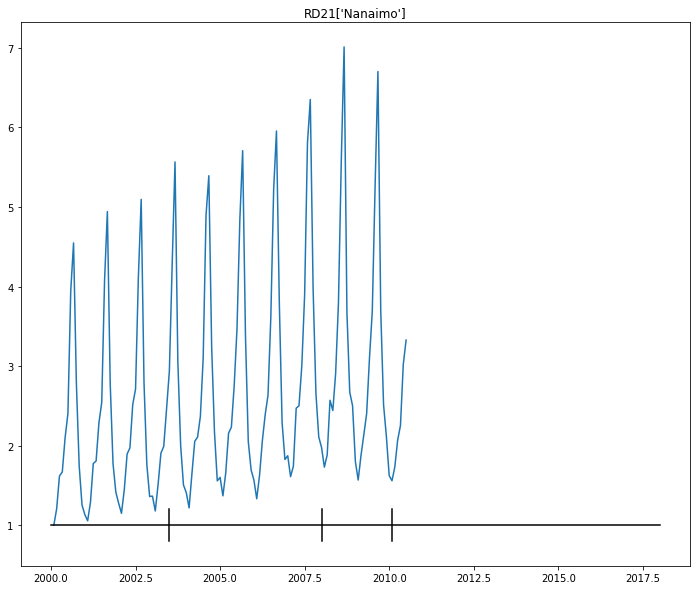

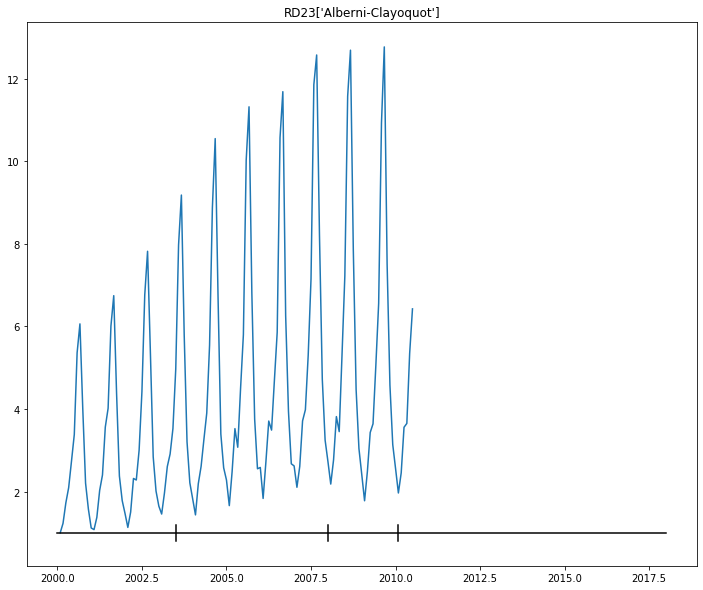

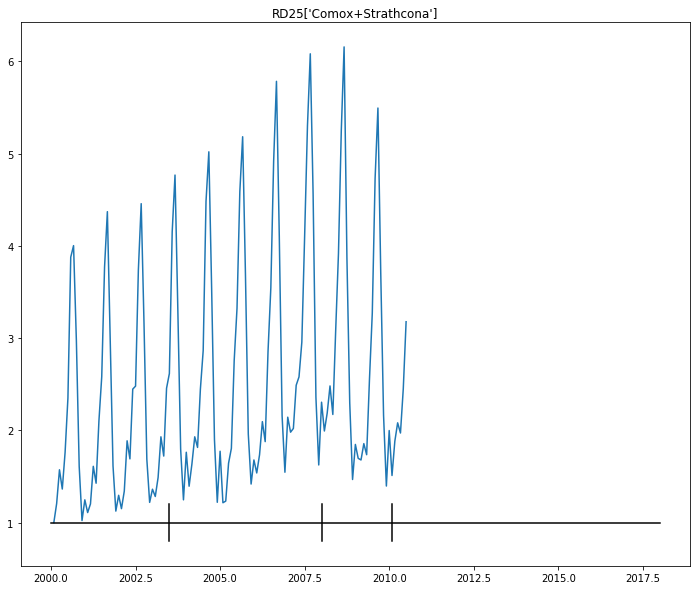

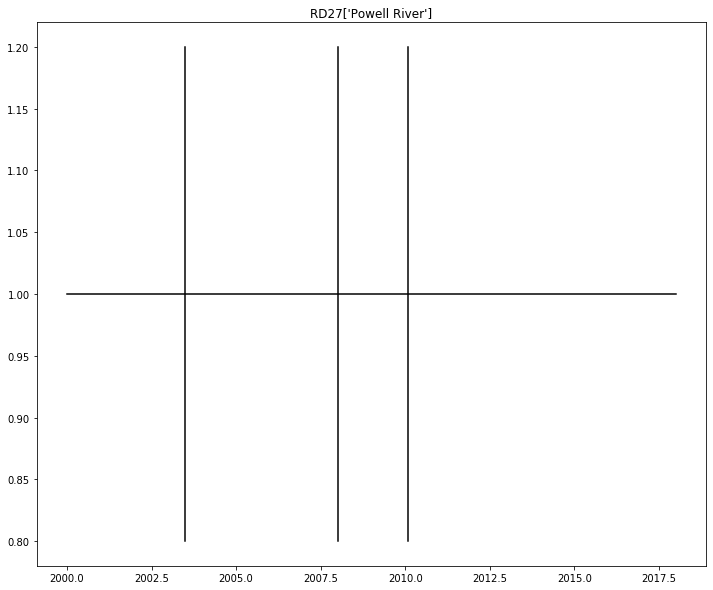

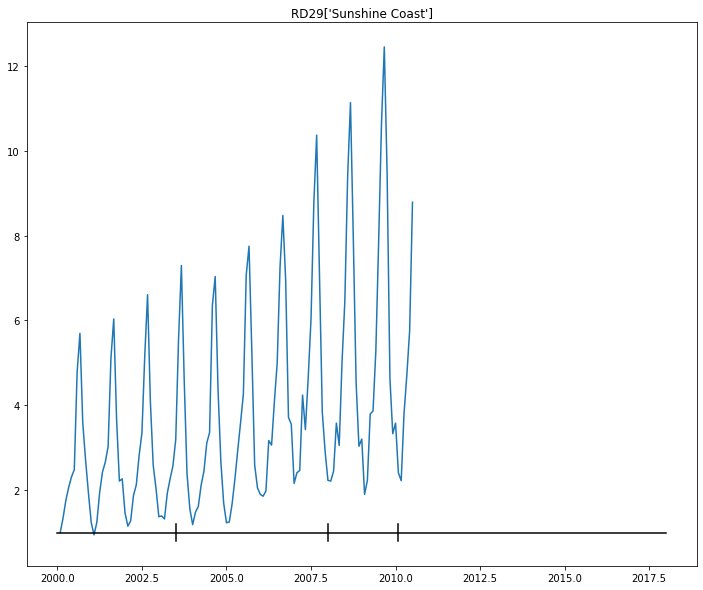

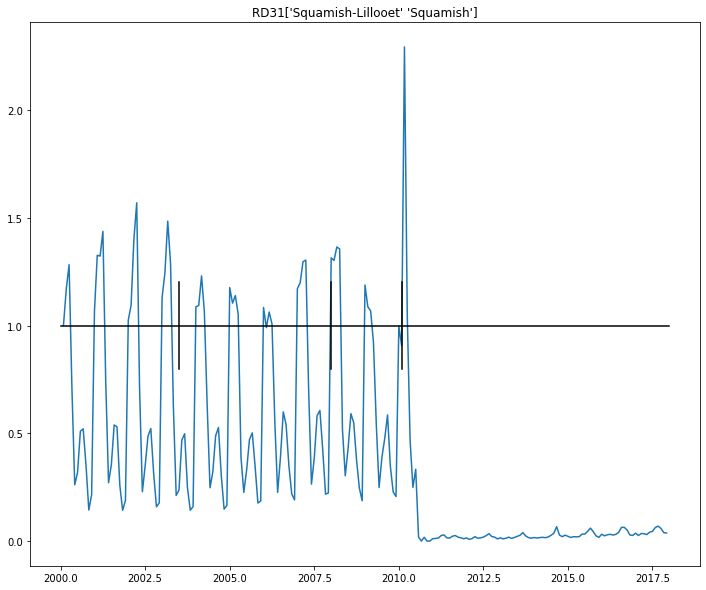

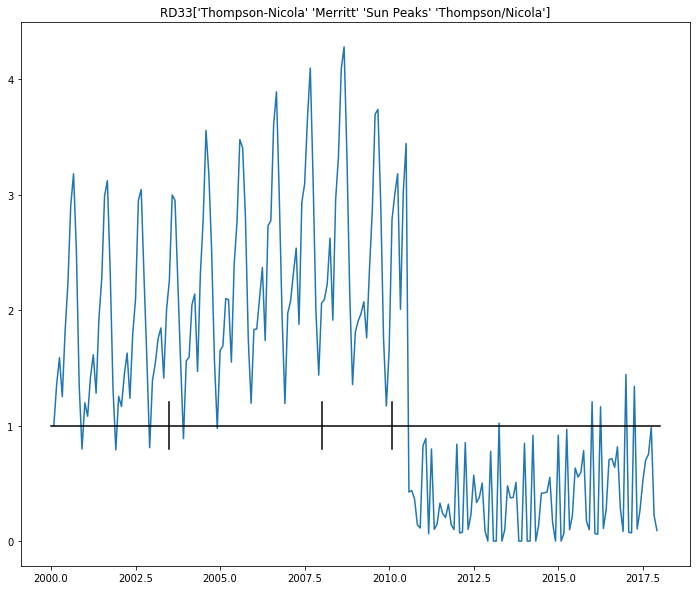

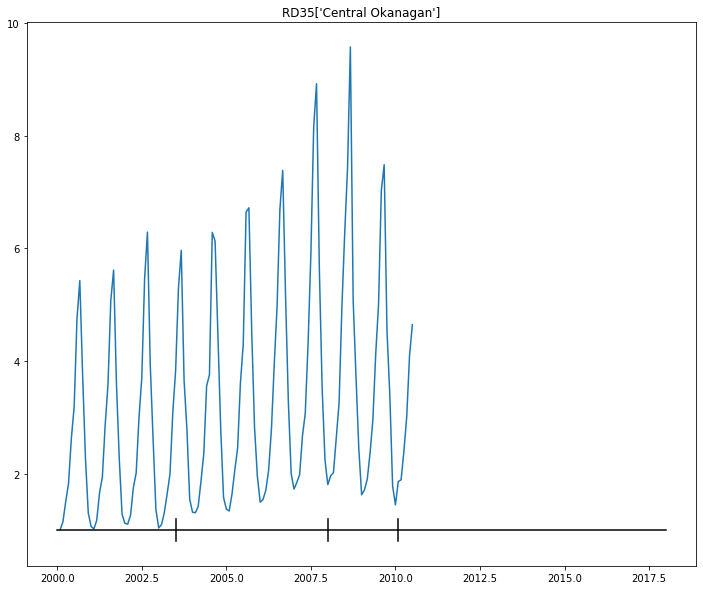

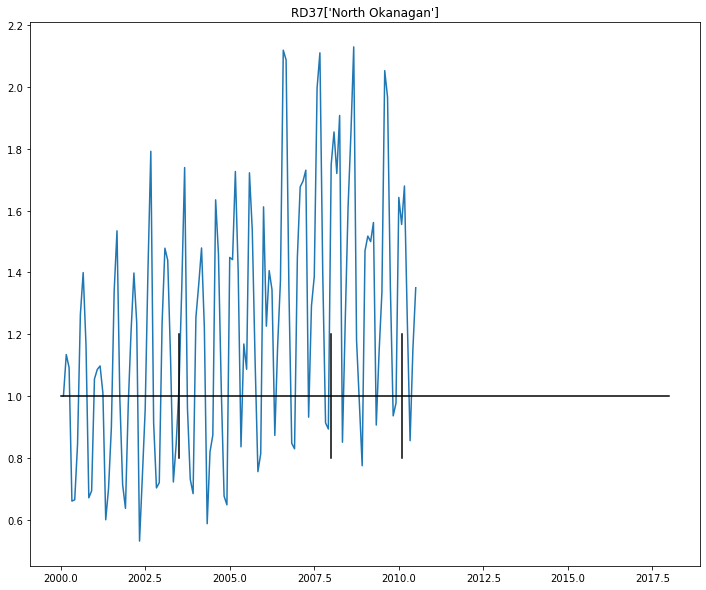

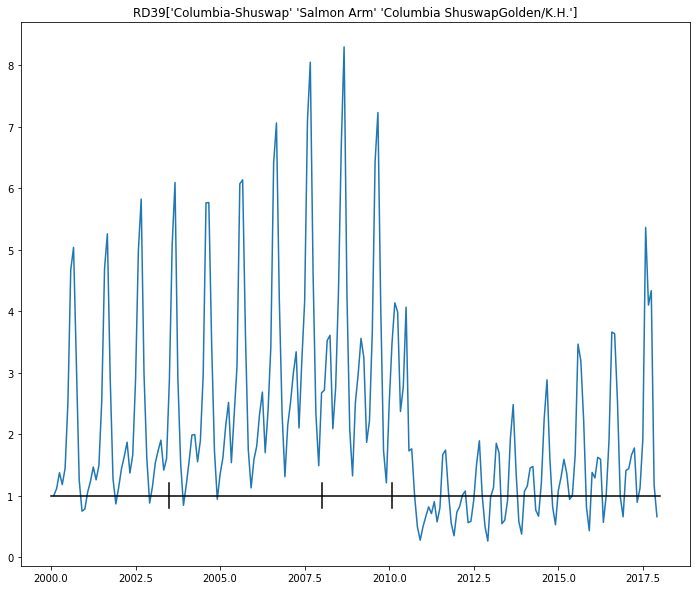

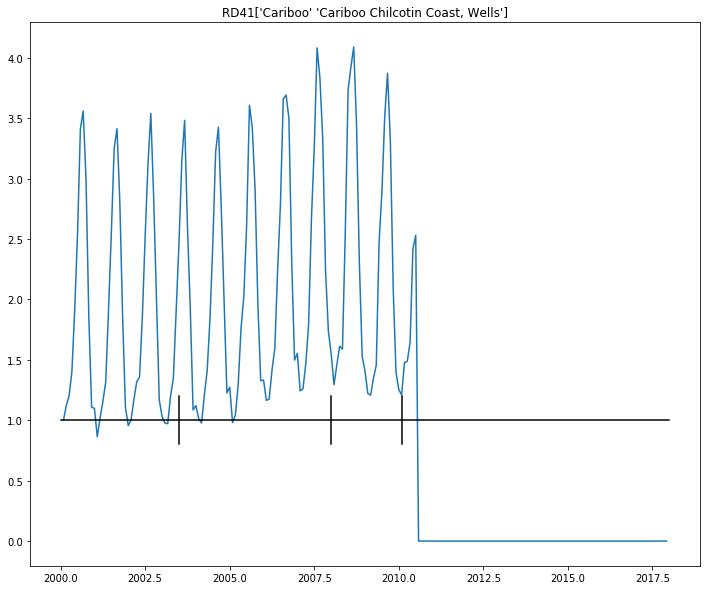

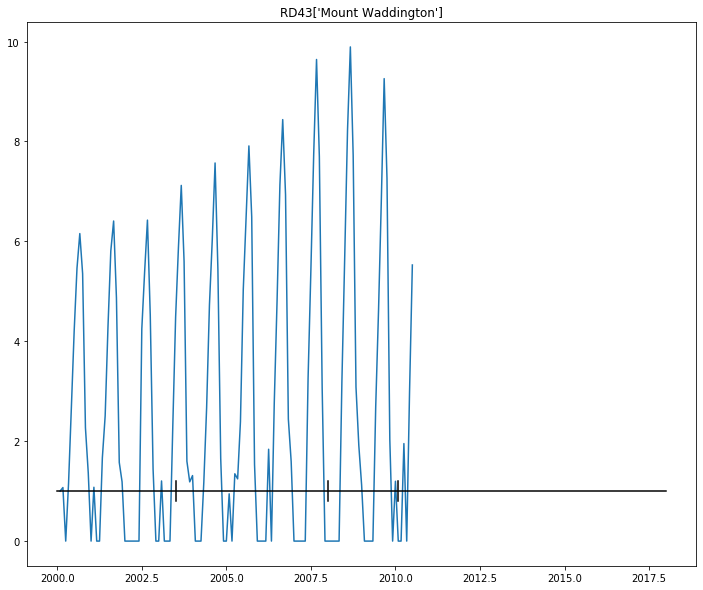

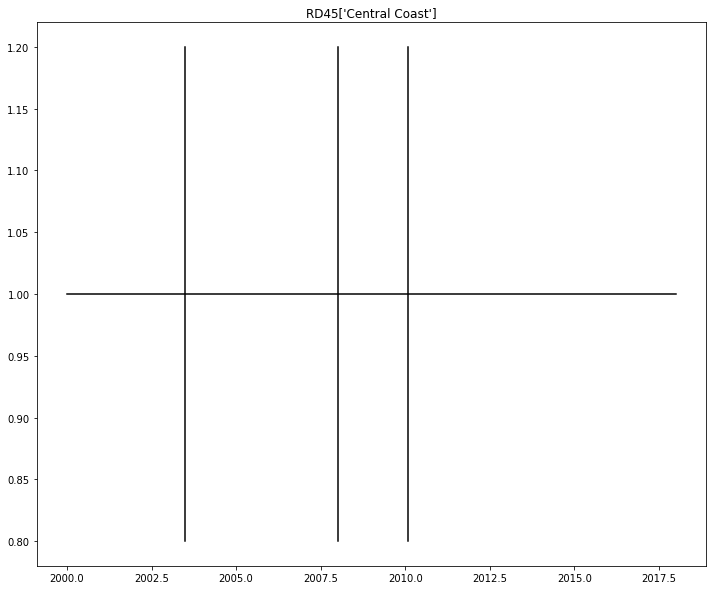

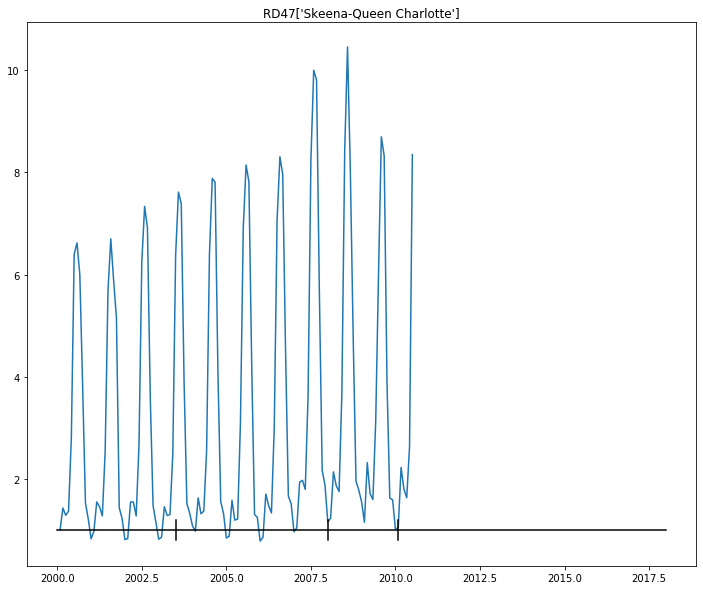

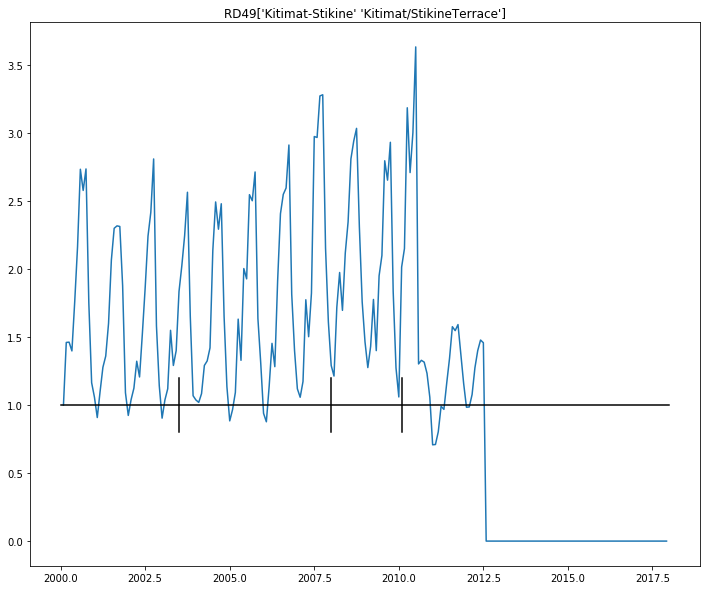

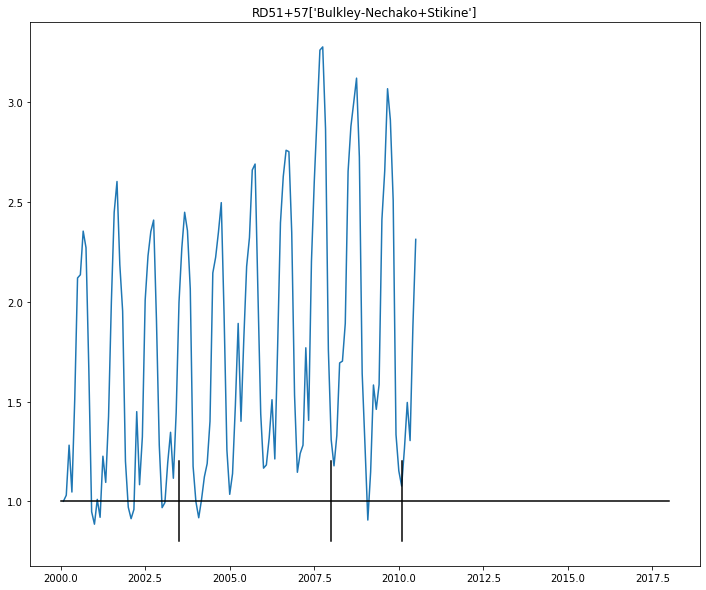

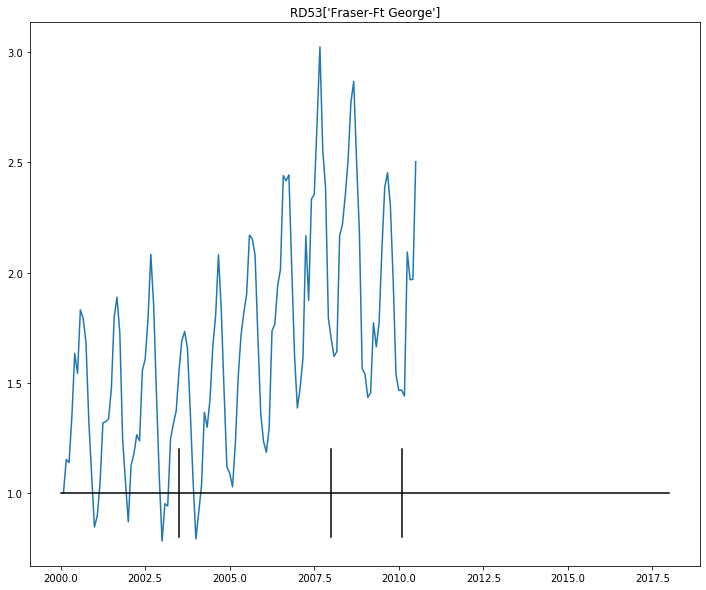

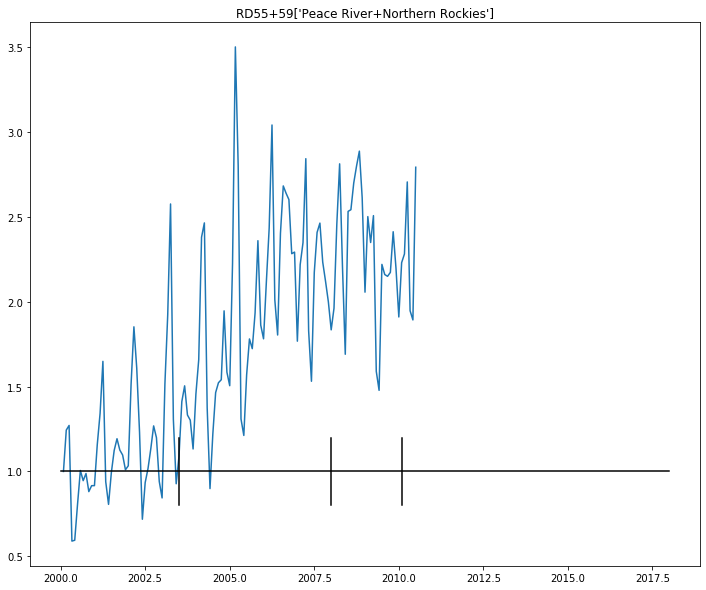

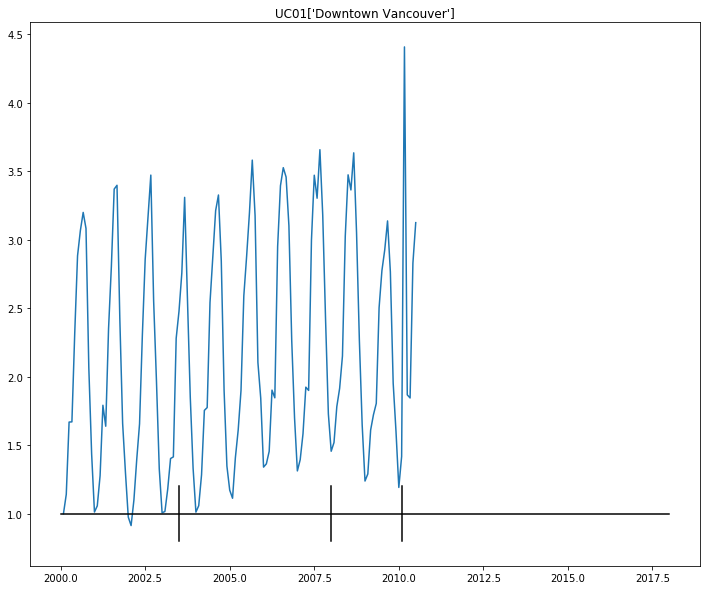

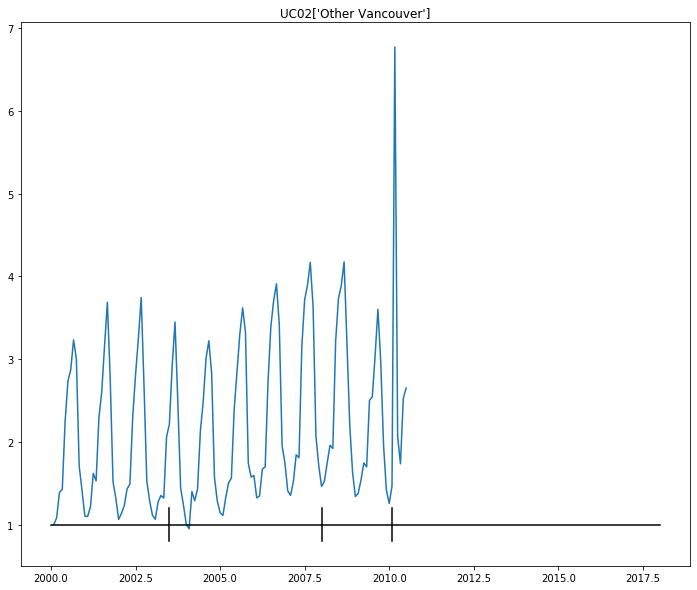

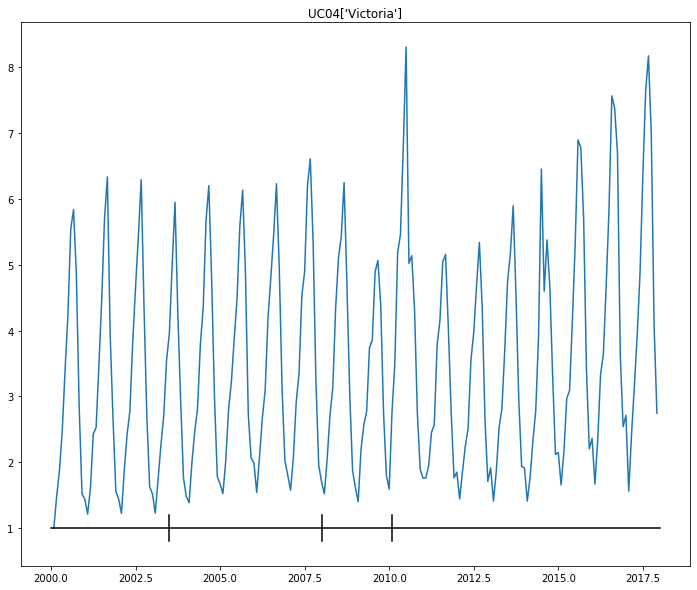

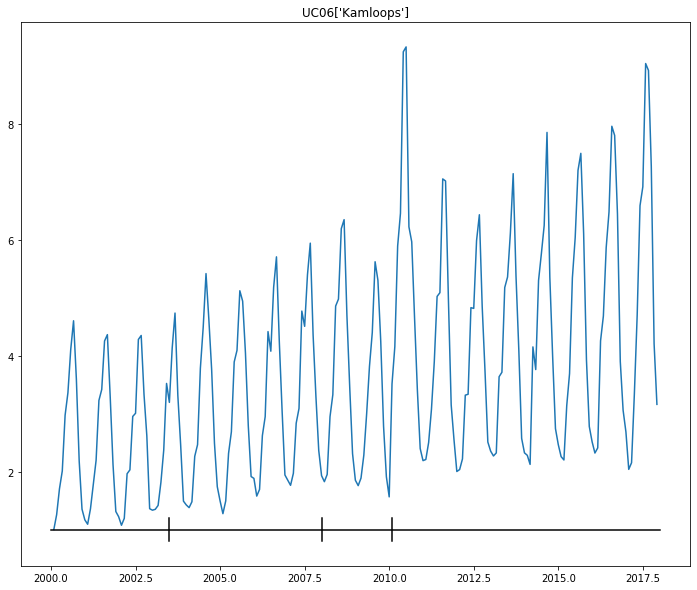

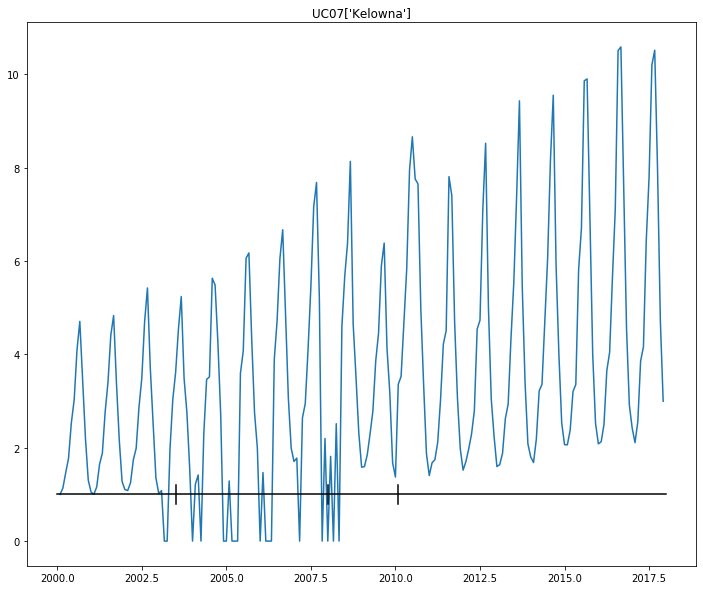

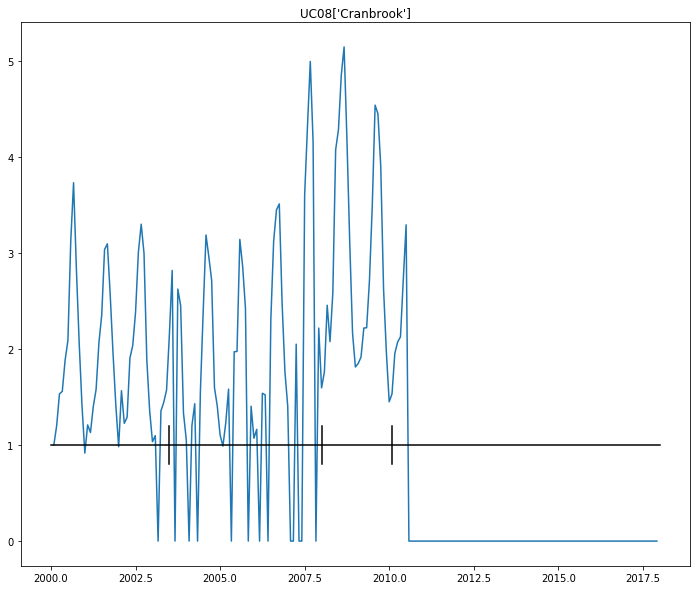

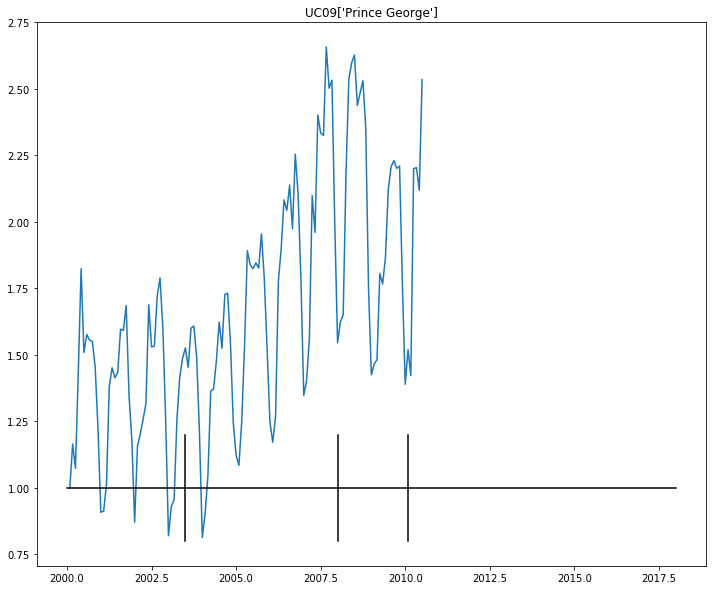

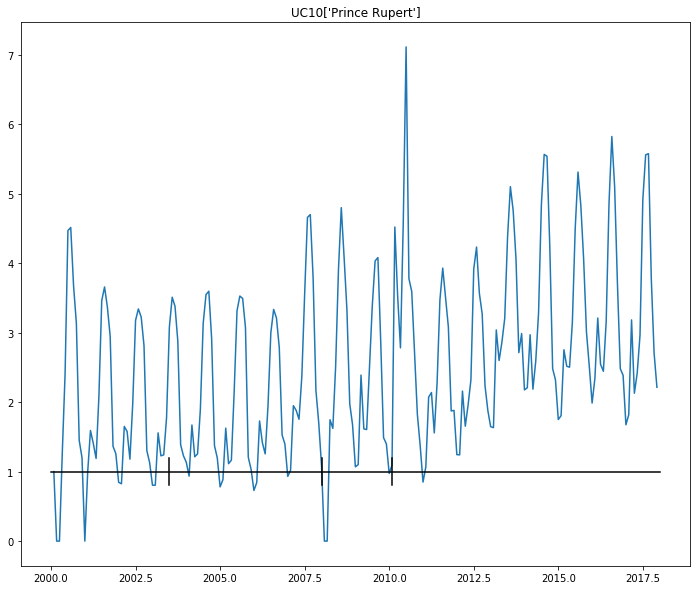

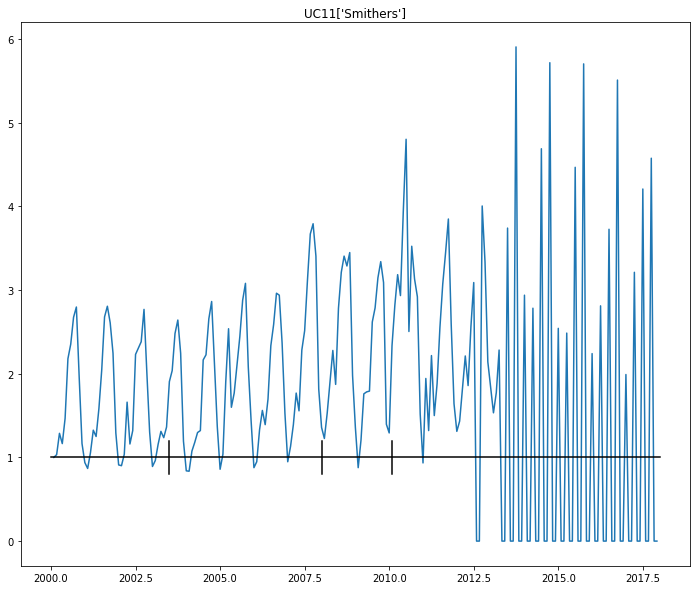

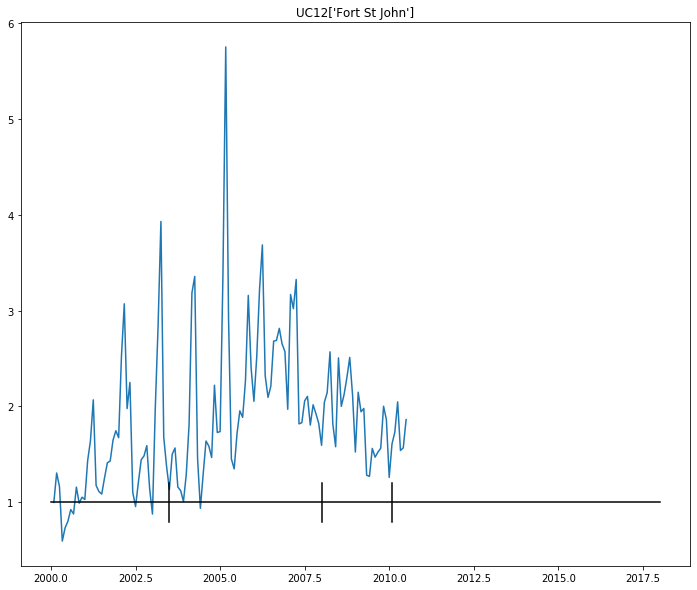

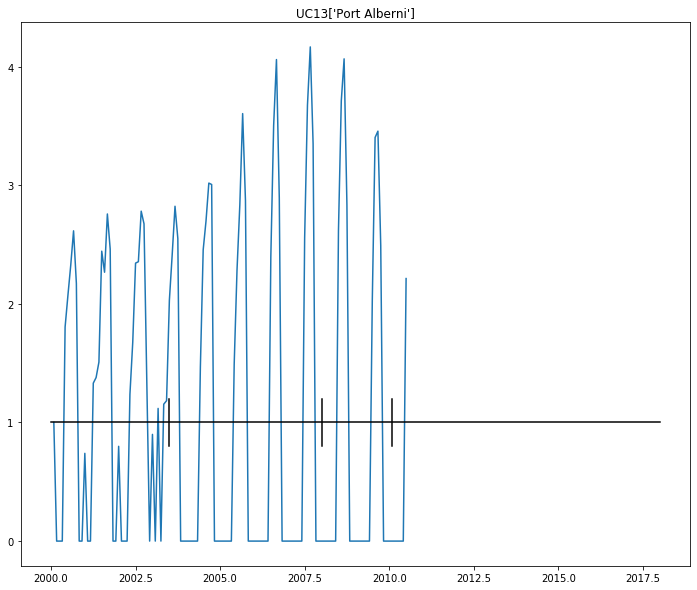

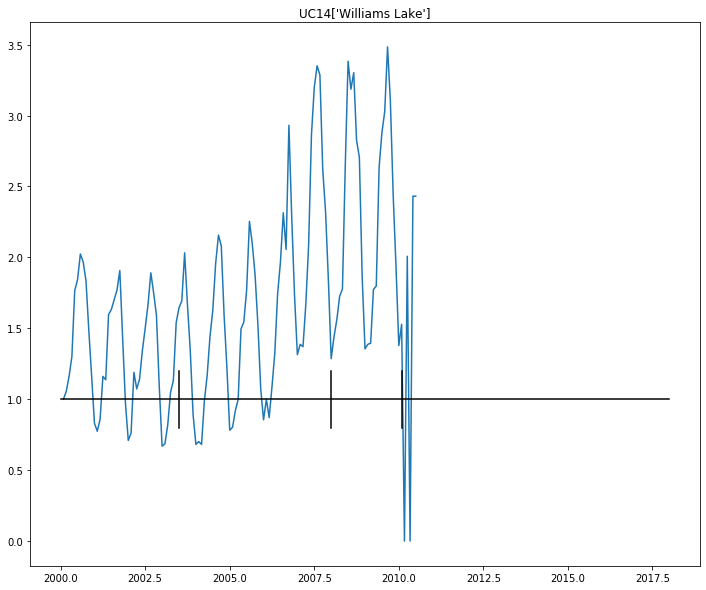

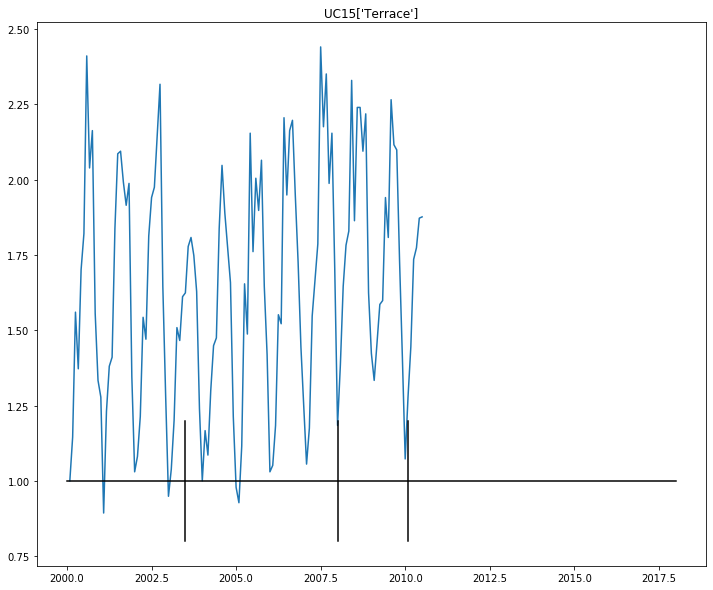

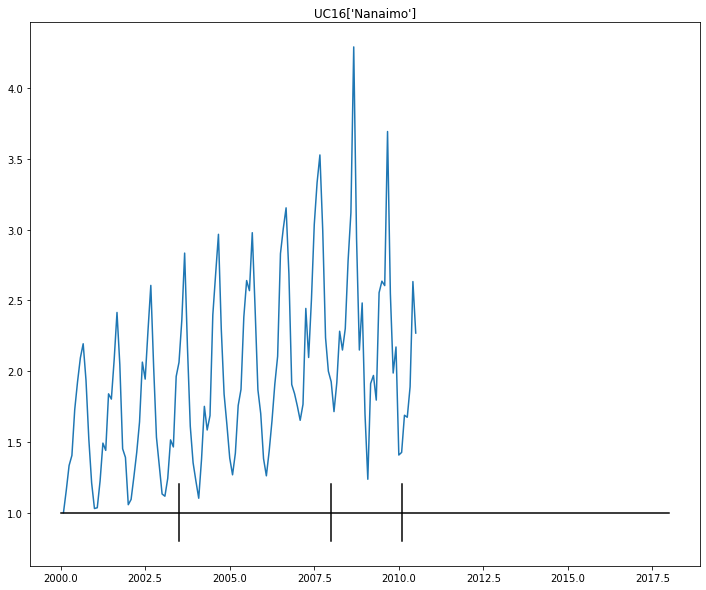

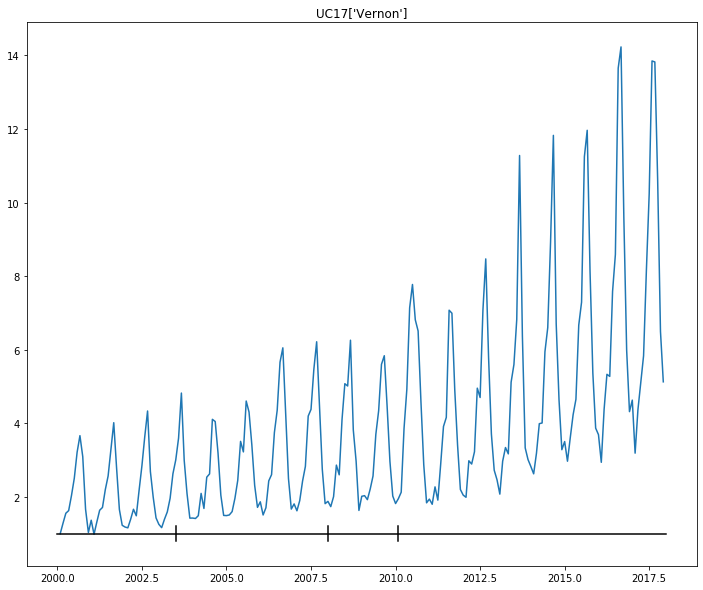

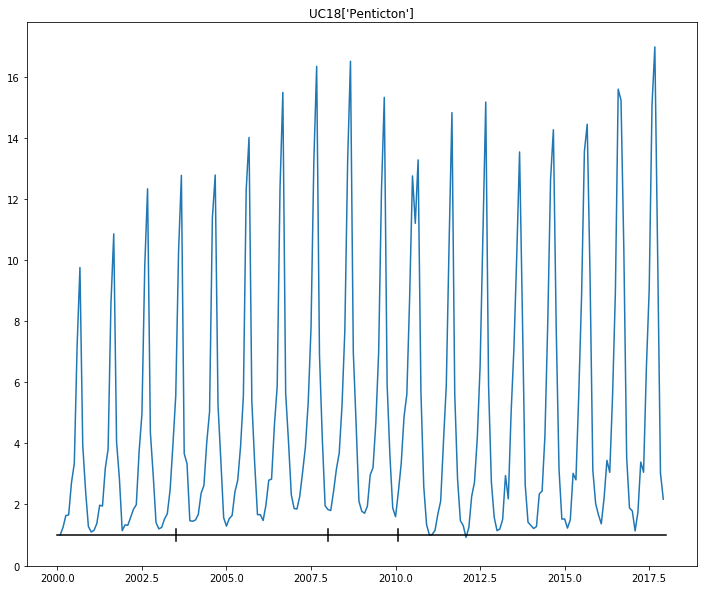

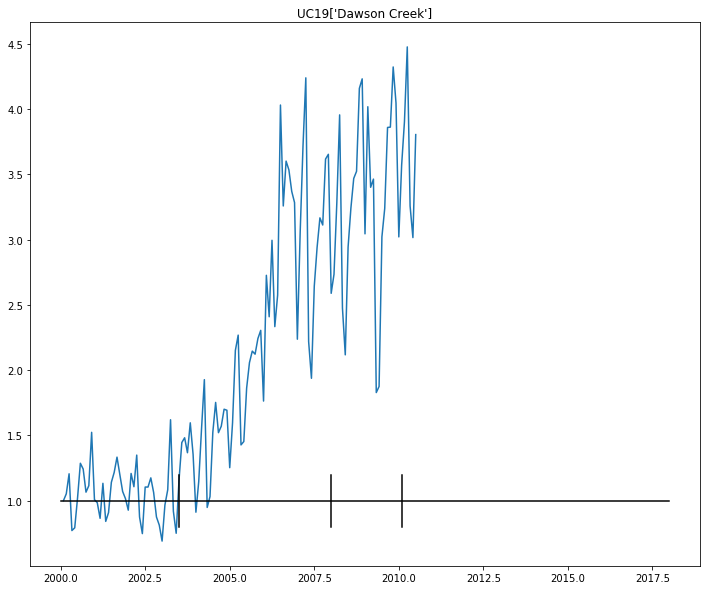

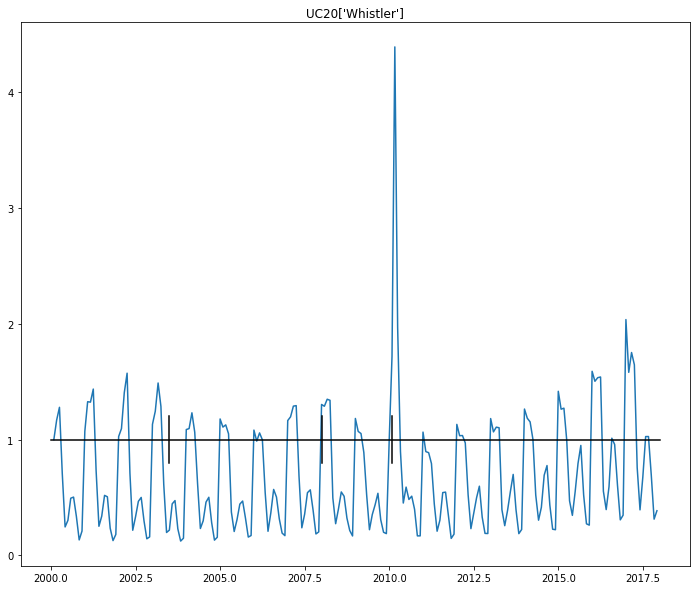

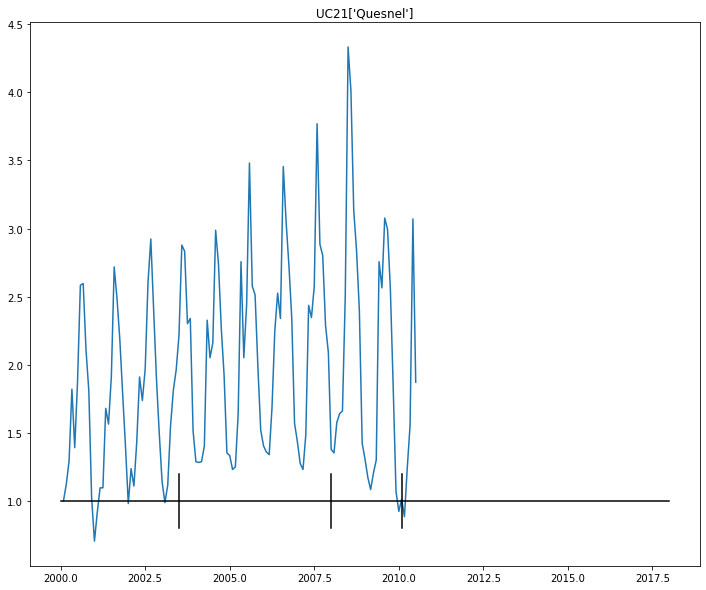

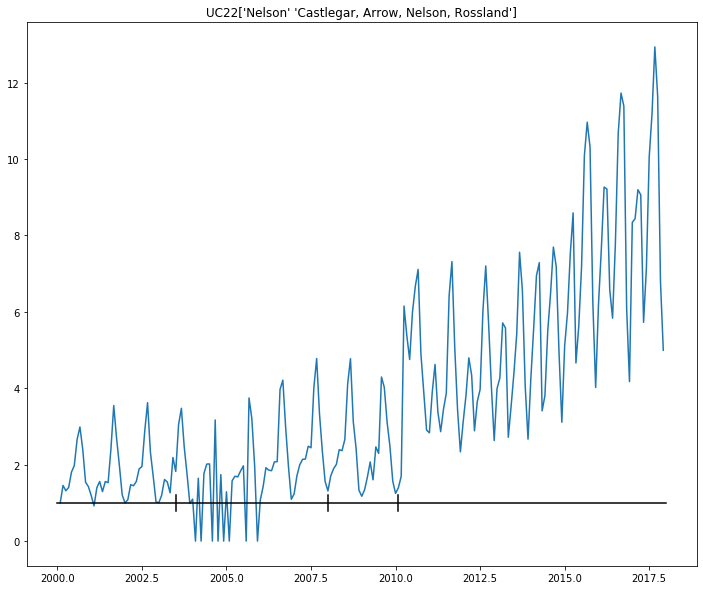

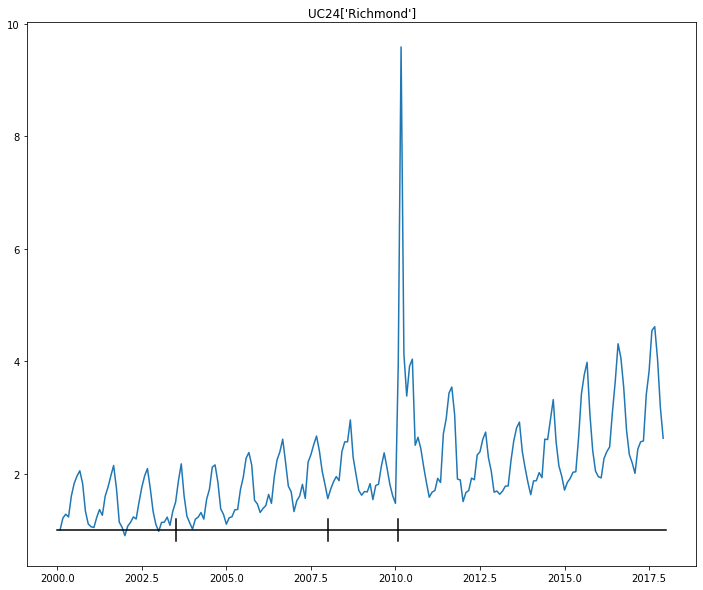

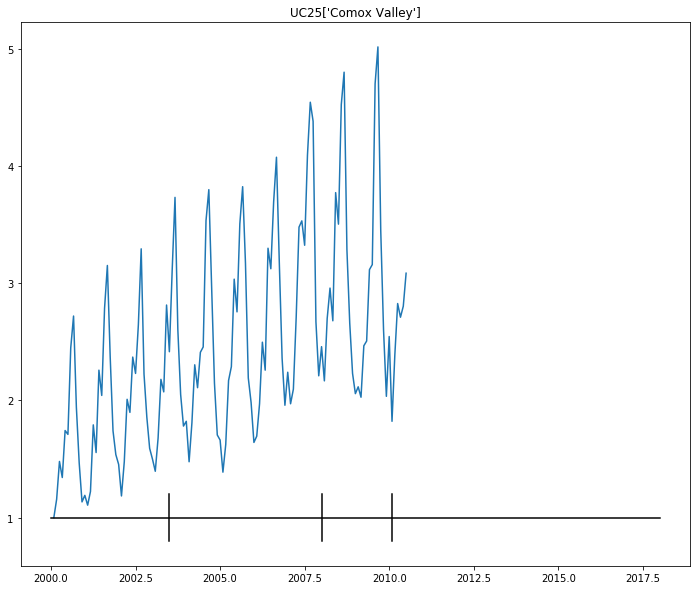

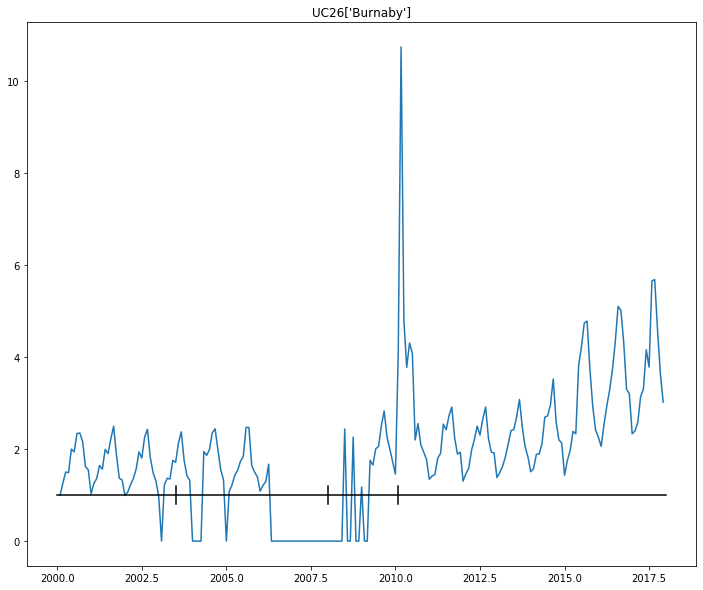

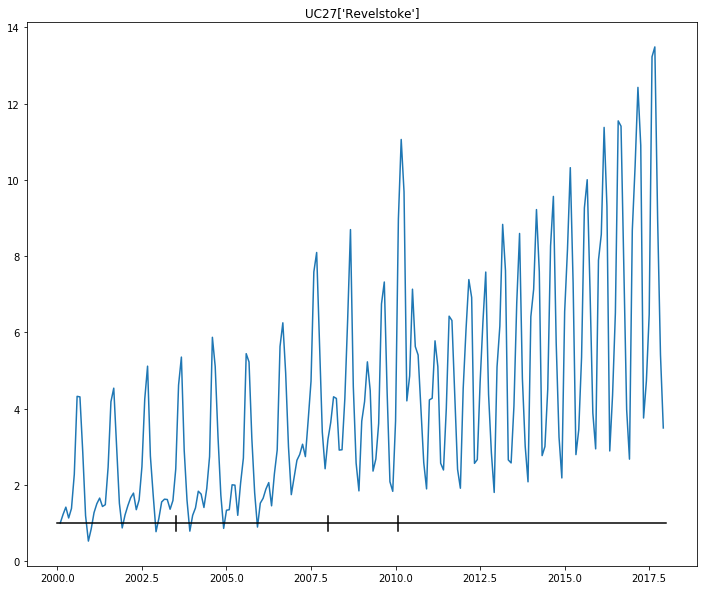

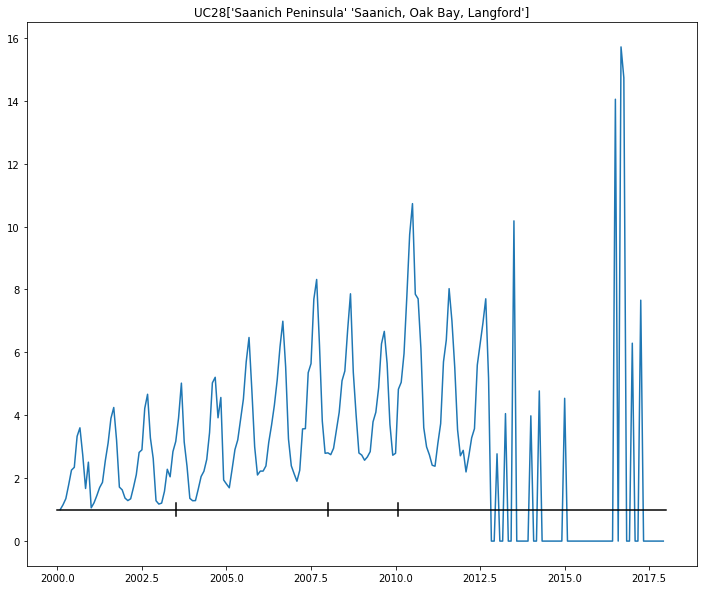

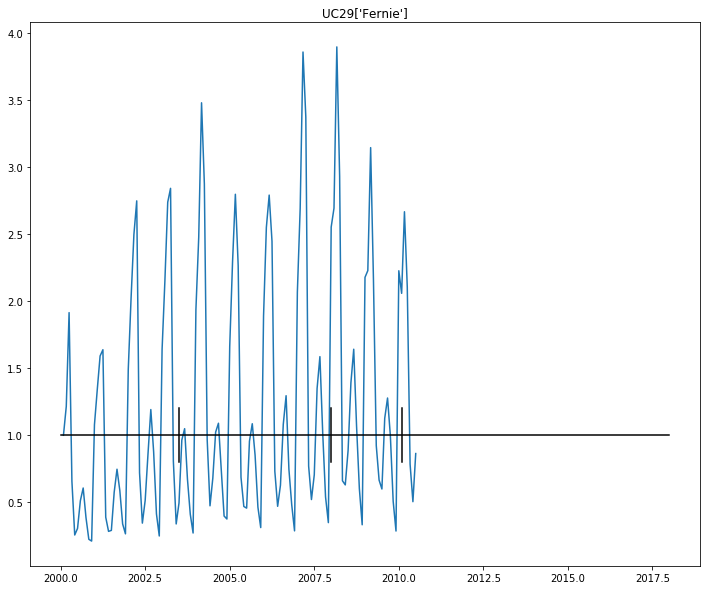

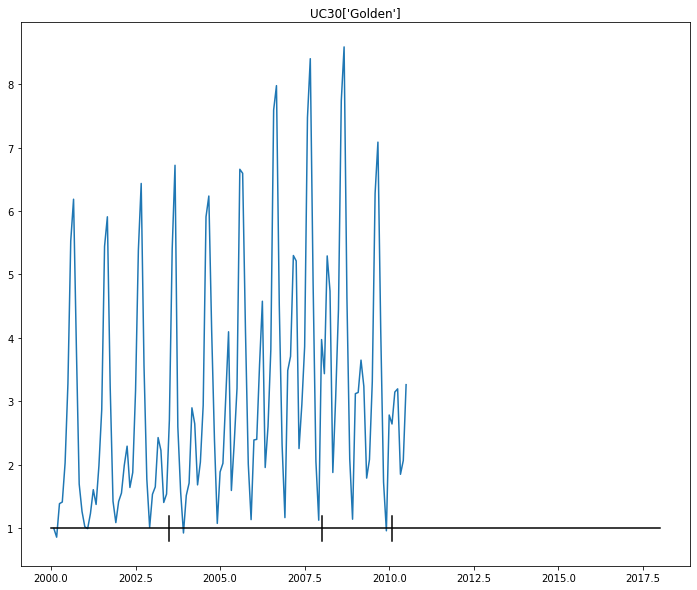

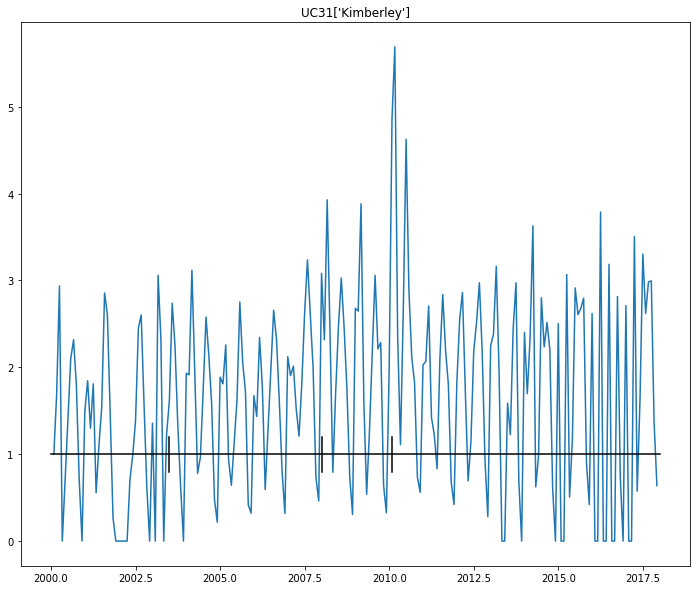

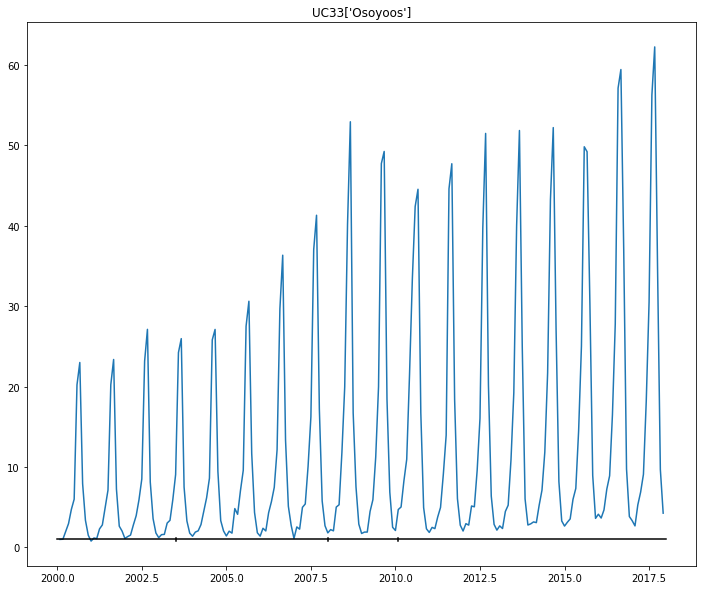

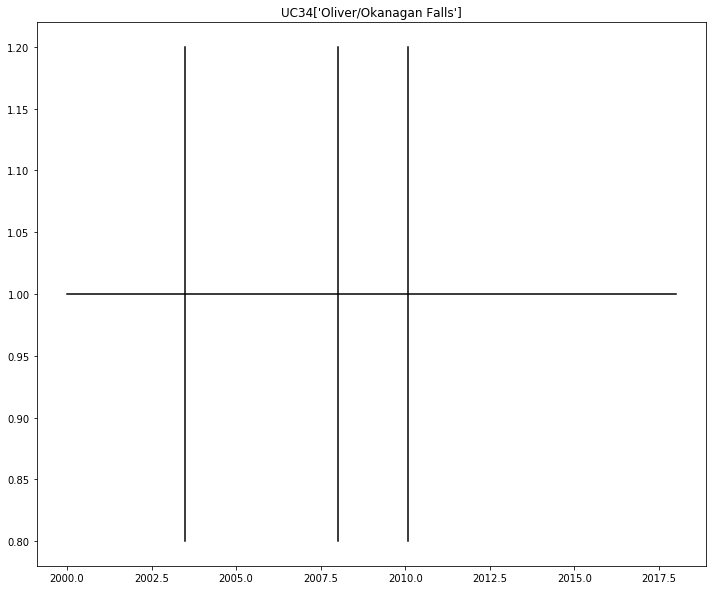

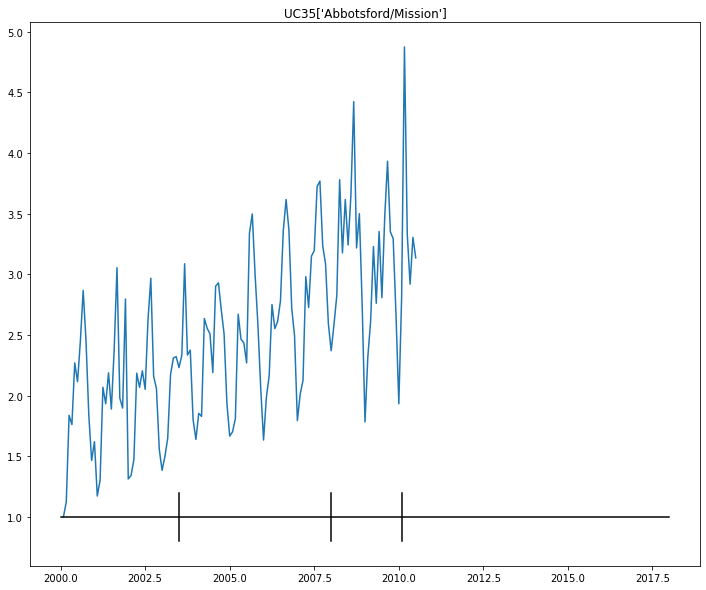

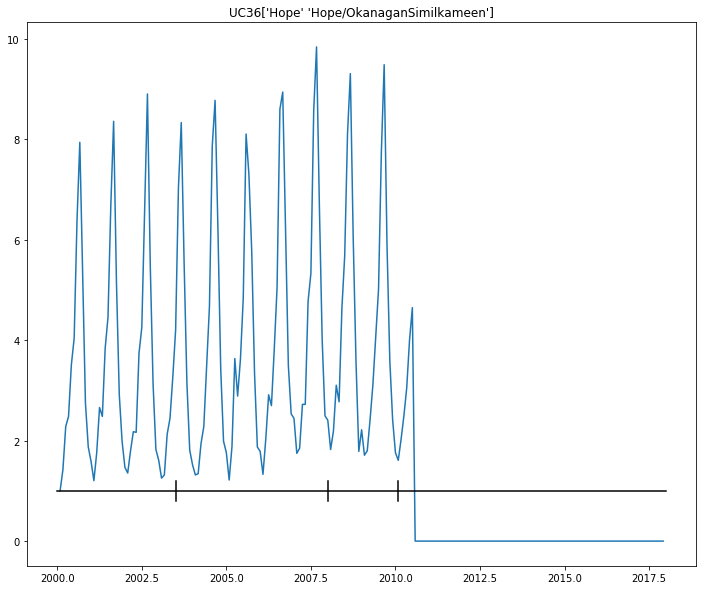

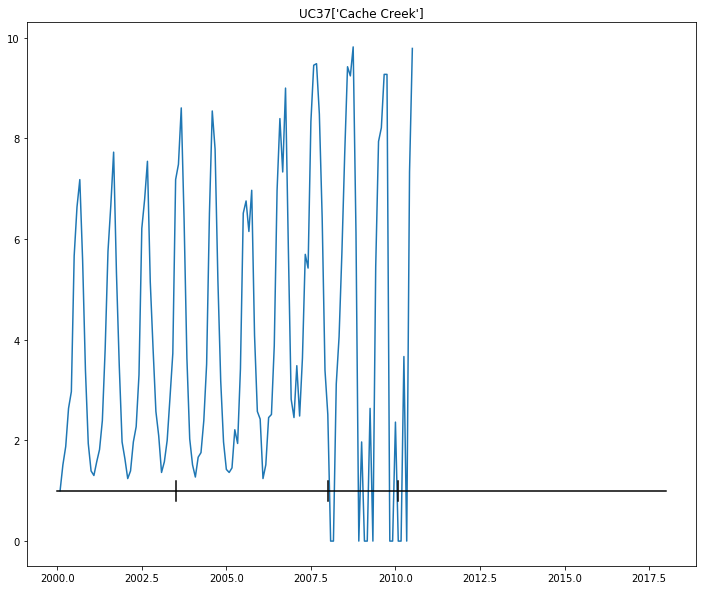

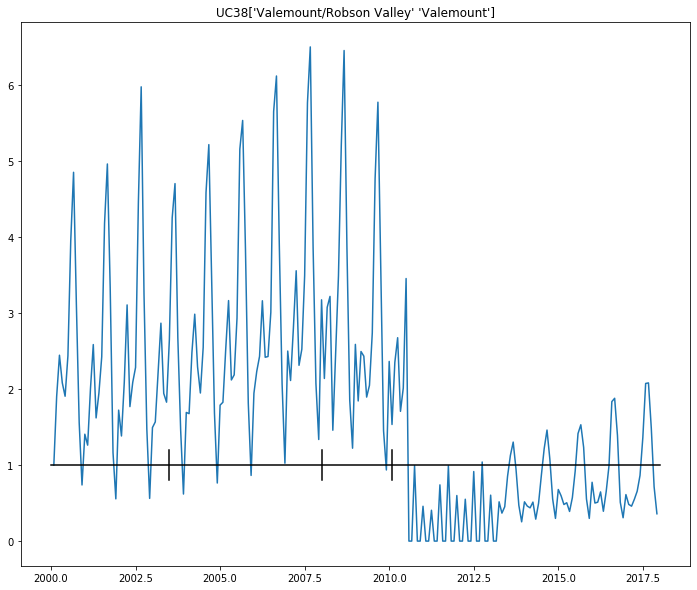

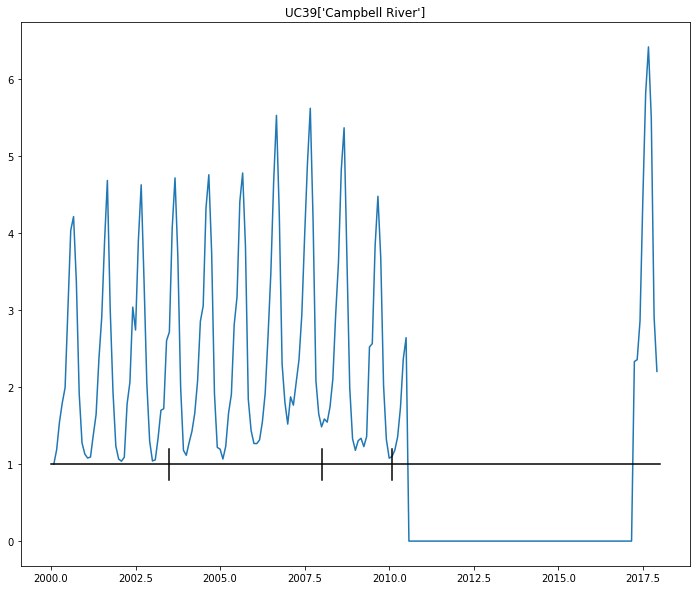

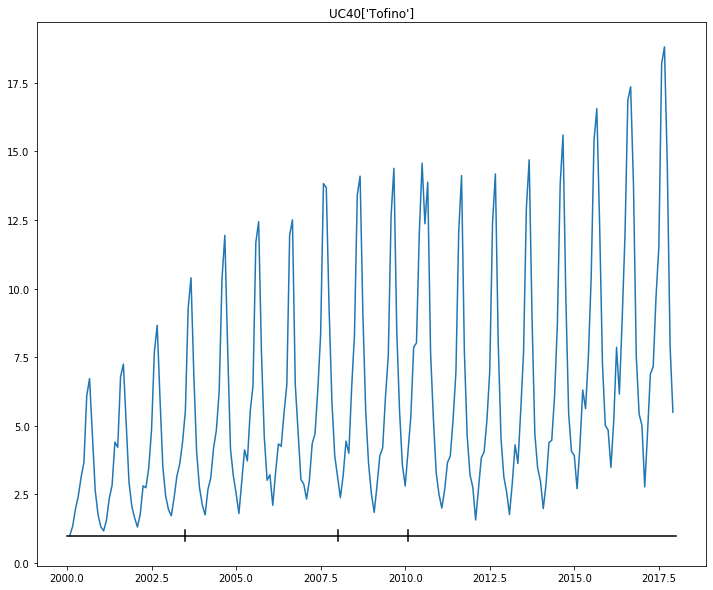

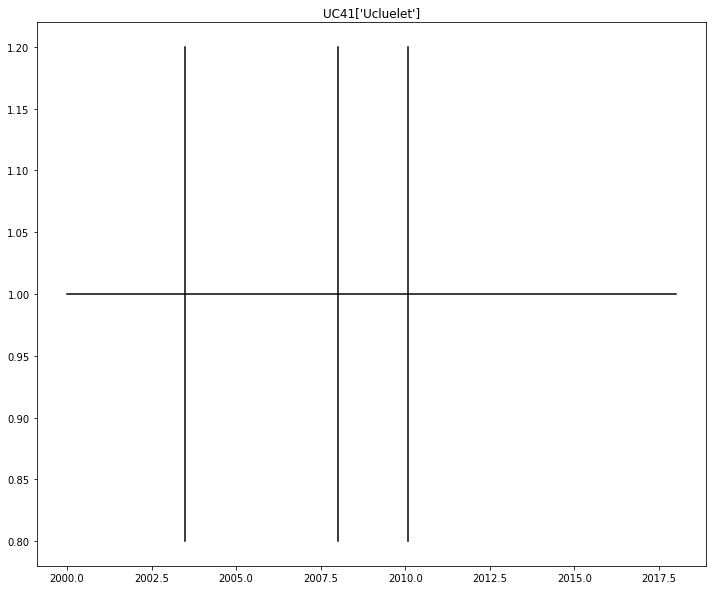

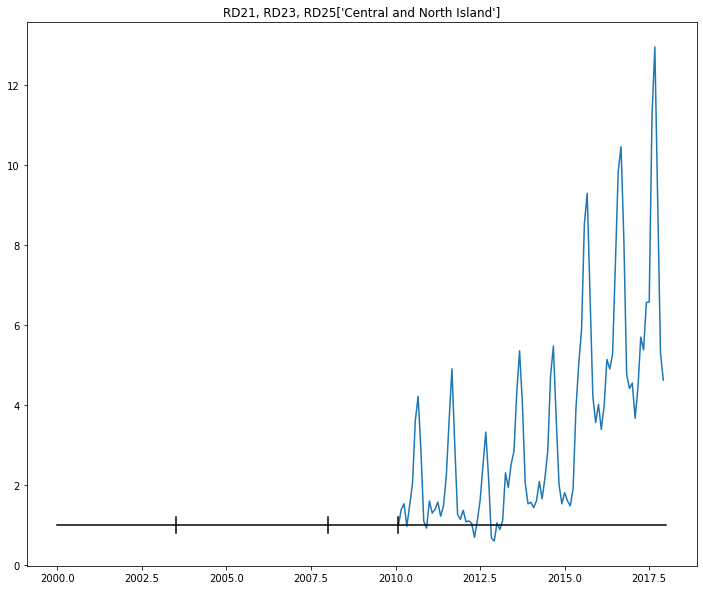

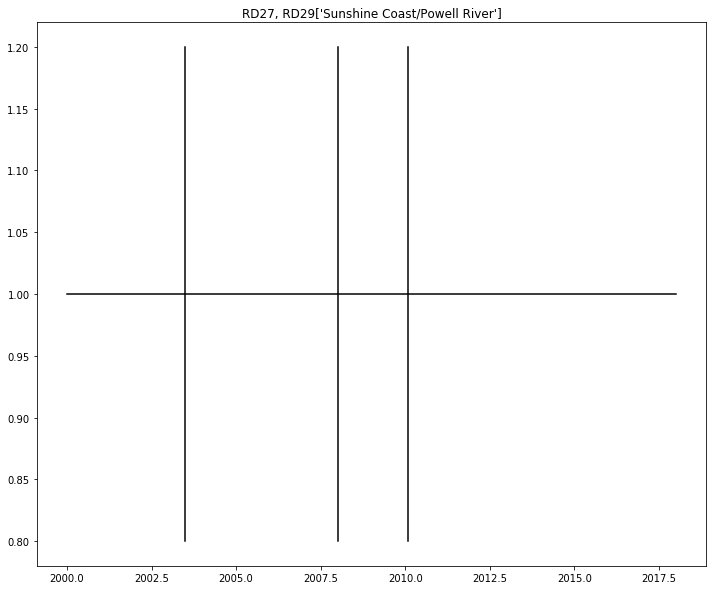

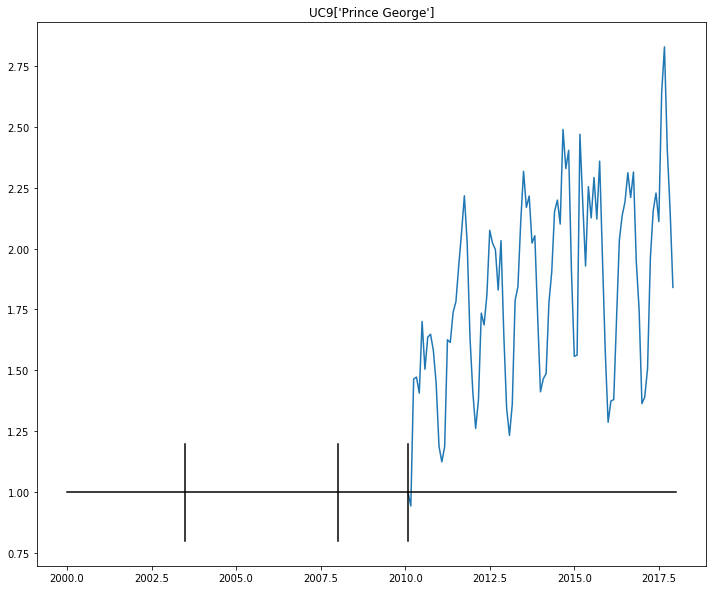

In [48]:
for codes in vrv.region_code.unique():
    vrv_part = vrv[vrv.region_code == codes]
    vrv_part = pd.DataFrame(vrv_part.groupby(['year','month'])['revenue'].sum()).reset_index()
    vrv_part['time_in_order'] = (vrv_part['year'].reset_index(drop = True) + pd.Series([a/12 for a in vrv_part['month']])).tolist()
    vrv_part = vrv_part.sort_values('time_in_order')
    plt.figure(figsize = (12,10))
    plt.plot(vrv_part.time_in_order[vrv_part.time_in_order<2018],vrv_part.revenue[vrv_part.time_in_order<2018]/vrv_part.revenue.iloc[0])


    plt.plot([2008,2008],[.8,1.2],color = 'black')
    plt.plot([2003.5,2003.5],[.8,1.2],color = 'black')
    plt.plot([2010+1/12,2010+1/12],[.8,1.2],color = 'black')
    plt.plot([2000,2018],[1,1],color = 'black')
    plt.title(codes+str(vrv[vrv.region_code == codes].region_name.unique()))
   

Text(0.5, 1.0, 'Percentage increase in Room Revenue in canada, compared to the same month last year')

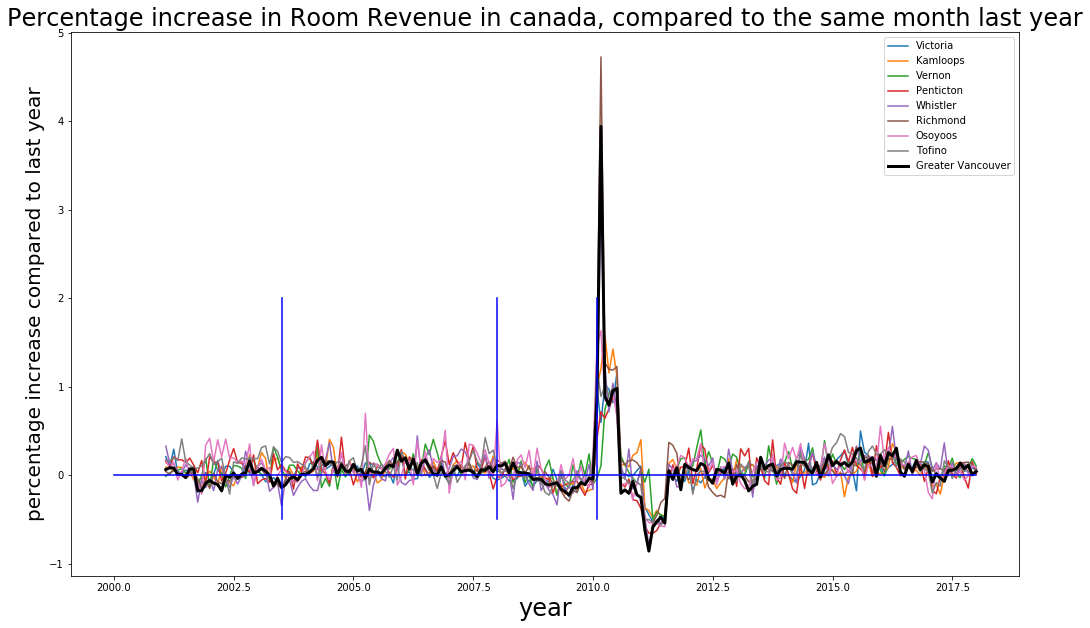

In [49]:
vrv_2018 = vrv[vrv.year<=2017]
valid_regions = ['UC04','UC06','UC17','UC18','UC20','UC24','UC33','UC40','RD15']
valid_name = ['Victoria','Kamloops','Vernon','Penticton','Whistler','Richmond','Osoyoos','Tofino','Greater Vancouver']

plt.figure(figsize = (17,10))
for codes in valid_regions:
    vrv_part = vrv_2018[vrv_2018.region_code == codes]
    vrv_part = pd.DataFrame(vrv_part.groupby(['year','month'])['revenue'].sum()).reset_index()
    vrv_part['time_in_order'] = (vrv_part['year'].reset_index(drop = True) + pd.Series([a/12 for a in vrv_part['month']])).tolist()
    
    vrv_van = pd.DataFrame()
    vrv_van_pre = vrv_part
    for m in vrv_van_pre.month.unique():
        sub = vrv_van_pre[vrv_van_pre.month == m]
        sub['prev_val'] = np.NaN
        sub['prev_val'][1:] =  sub['revenue'][:-1].tolist()
        vrv_van = pd.concat([vrv_van,sub])
    vrv_van['prec_increase'] = vrv_van['revenue'] / vrv_van['prev_val']
    vrv_van = vrv_van.sort_values('time_in_order')

    if codes == 'RD15':
        plt.plot(vrv_van.time_in_order,vrv_van.prec_increase-1,linewidth = 3,color = 'black')
    else:
        plt.plot(vrv_van.time_in_order,vrv_van.prec_increase-1)


    
    
plt.legend(valid_name)
plt.plot([2008,2008],[-.5,2],color = 'blue')
plt.plot([2003.5,2003.5],[-.5,2],color = 'blue')
plt.plot([2010+1/12,2010+1/12],[-.5,2],color = 'blue')
plt.plot([2000,2018],[0,0],color = 'blue')
plt.xlabel('year',fontsize = 24)
plt.ylabel('percentage increase compared to last year',fontsize = 20)
plt.title('Percentage increase in Room Revenue in canada, compared to the same month last year',fontsize = 24)



Text(0.5, 1.0, 'Percentage increase in Room Revenue in canada, compared to the same month in 2000')

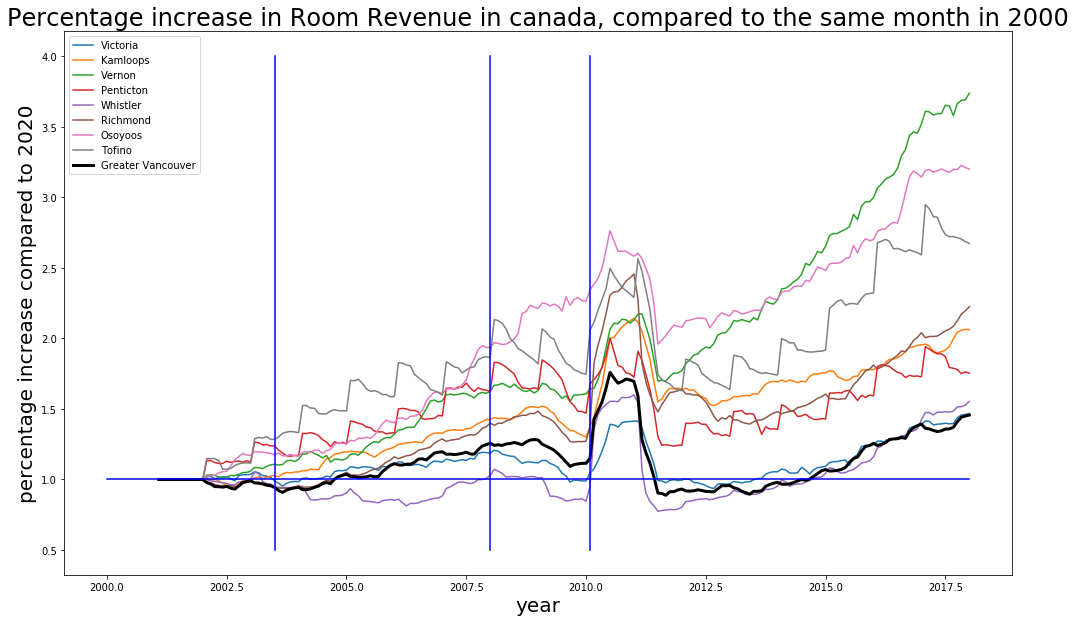

In [50]:
vrv_2018 = vrv[vrv.year<=2017]
valid_regions = ['UC04','UC06','UC17','UC18','UC20','UC24','UC33','UC40','RD15']
valid_name = ['Victoria','Kamloops','Vernon','Penticton','Whistler','Richmond','Osoyoos','Tofino','Greater Vancouver']

plt.figure(figsize = (17,10))
for codes in valid_regions:
    
    wind = 12
    vrv_part = vrv_2018[vrv_2018.region_code == codes]
    vrv_part = pd.DataFrame(vrv_part.groupby(['year','month'])['revenue'].sum()).reset_index()
    vrv_part['time_in_order'] = (vrv_part['year'].reset_index(drop = True) + pd.Series([a/12 for a in vrv_part['month']])).tolist()
    
    
    vrv_van = pd.DataFrame()
    
    
    vrv_van_pre = vrv_part
    vrv_van_pre['rolling_revenue'] = vrv_van_pre['revenue'].rolling(wind).mean().to_list()
    vrv_van_pre = vrv_van_pre.iloc[(wind):]
    
    
    for m in vrv_van_pre.month.unique():
        sub = vrv_van_pre[vrv_van_pre.month == m]
        sub['prev_val'] = sub['rolling_revenue'].iloc[0]
        vrv_van = pd.concat([vrv_van,sub])
    vrv_van['prec_increase'] = vrv_van['rolling_revenue'] / vrv_van['prev_val']
    vrv_van = vrv_van.sort_values('time_in_order')

    if codes == 'RD15':
        plt.plot(vrv_van.time_in_order,vrv_van.prec_increase,linewidth = 3,color = 'black')
    else:
        plt.plot(vrv_van.time_in_order,vrv_van.prec_increase)


    
plt.legend(valid_name)
plt.plot([2008,2008],[.5,4],color = 'blue')
plt.plot([2003.5,2003.5],[.5,4],color = 'blue')
plt.plot([2010+1/12,2010+1/12],[.5,4],color = 'blue')
plt.plot([2000,2018],[1,1],color = 'blue')
   
plt.xlabel('year',fontsize = 20)
plt.ylabel('percentage increase compared to 2020',fontsize = 20)
plt.title('Percentage increase in Room Revenue in canada, compared to the same month in 2000',fontsize = 24)




Text(0.5, 1.0, 'Percentage increase in Room Revenue in canada, compared to the same month in 2000')

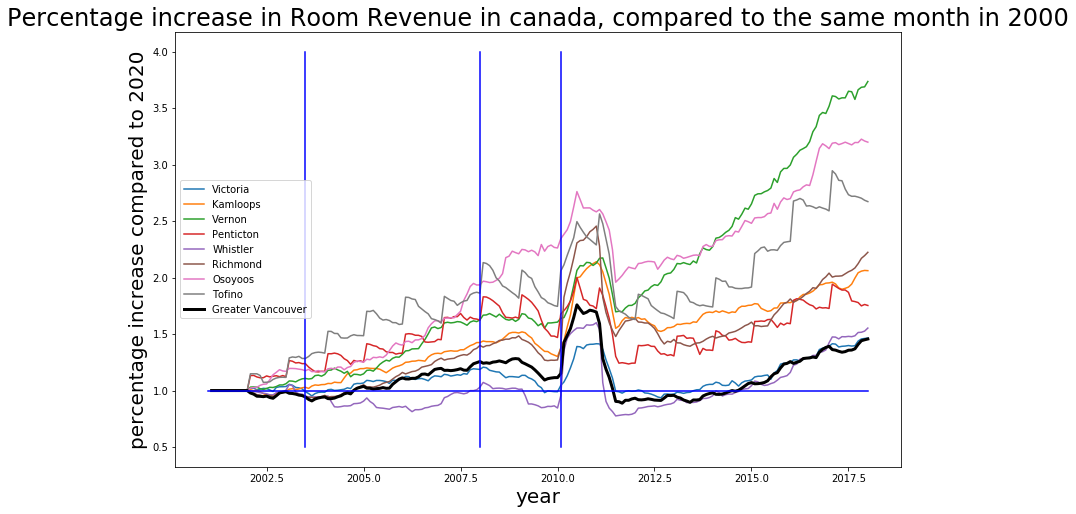

In [51]:
vrv_2018 = vrv[vrv.year<=2017]
valid_regions = ['UC04','UC06','UC17','UC18','UC20','UC24','UC33','UC40','RD15']
valid_name = ['Victoria','Kamloops','Vernon','Penticton','Whistler','Richmond','Osoyoos','Tofino','Greater Vancouver']

plt.figure(figsize = (13,8))
for codes in valid_regions:
    
    wind = 12
    vrv_part = vrv_2018[vrv_2018.region_code == codes]
    vrv_part = pd.DataFrame(vrv_part.groupby(['year','month'])['revenue'].sum()).reset_index()
    vrv_part['time_in_order'] = (vrv_part['year'].reset_index(drop = True) + pd.Series([a/12 for a in vrv_part['month']])).tolist()
    
    
    vrv_van = pd.DataFrame()
    
    
    vrv_van_pre = vrv_part
    vrv_van_pre['rolling_revenue'] = vrv_van_pre['revenue'].rolling(wind).mean().to_list()
    vrv_van_pre = vrv_van_pre.iloc[(wind):]
    
    
    for m in vrv_van_pre.month.unique():
        sub = vrv_van_pre[vrv_van_pre.month == m]
        sub['prev_val'] = sub['rolling_revenue'].iloc[0]
        vrv_van = pd.concat([vrv_van,sub])
    vrv_van['prec_increase'] = vrv_van['rolling_revenue'] / vrv_van['prev_val']
    vrv_van = vrv_van.sort_values('time_in_order')

    if codes == 'RD15':
        plt.plot(vrv_van.time_in_order,vrv_van.prec_increase,linewidth = 3,color = 'black')
    else:
        plt.plot(vrv_van.time_in_order,vrv_van.prec_increase)


    
plt.legend(valid_name)
plt.plot([2008,2008],[.5,4],color = 'blue')
plt.plot([2003.5,2003.5],[.5,4],color = 'blue')
plt.plot([2010+1/12,2010+1/12],[.5,4],color = 'blue')
plt.plot([2001,2018],[1,1],color = 'blue')
   
plt.xlabel('year',fontsize = 20)
plt.ylabel('percentage increase compared to 2020',fontsize = 20)
plt.title('Percentage increase in Room Revenue in canada, compared to the same month in 2000',fontsize = 24)




Text(0.5, 1.0, 'Percentage increase in Room Revenue in canada, compared to the same month in 2000')

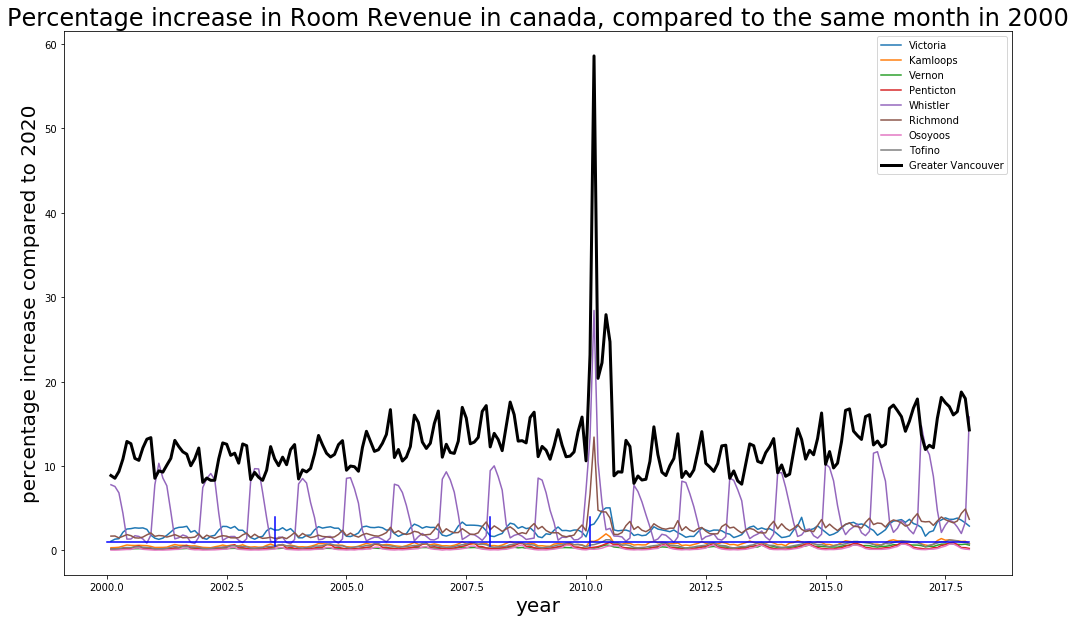

In [52]:
vrv_2018 = vrv[vrv.year<=2017]
valid_regions = ['UC04','UC06','UC17','UC18','UC20','UC24','UC33','UC40','RD15']
valid_name = ['Victoria','Kamloops','Vernon','Penticton','Whistler','Richmond','Osoyoos','Tofino','Greater Vancouver']

vrv_month_evener = vrv_2018[vrv_2018.year == 2000].groupby('month')['revenue'].mean()

plt.figure(figsize = (17,10))
for codes in valid_regions:
    vrv_part = vrv_2018[vrv_2018.region_code == codes]
    vrv_part = pd.DataFrame(vrv_part.groupby(['year','month'])['revenue'].sum()).reset_index()
    vrv_part['time_in_order'] = (vrv_part['year'].reset_index(drop = True) + pd.Series([a/12 for a in vrv_part['month']])).tolist()
    
    vrv_van = pd.DataFrame()
    vrv_van_pre = vrv_part
    for m in vrv_van_pre.month.unique():
        sub = vrv_van_pre[vrv_van_pre.month == m]
        sub['prev_val'] = vrv_month_evener.loc[m]
        vrv_van = pd.concat([vrv_van,sub])
    vrv_van['prec_increase'] = vrv_van['revenue'] / vrv_van['prev_val']
    vrv_van = vrv_van.sort_values('time_in_order')

    if codes == 'RD15':
        plt.plot(vrv_van.time_in_order,vrv_van.prec_increase,linewidth = 3,color = 'black')
    else:
        plt.plot(vrv_van.time_in_order,vrv_van.prec_increase)


    
plt.legend(valid_name)
plt.plot([2008,2008],[.5,4],color = 'blue')
plt.plot([2003.5,2003.5],[.5,4],color = 'blue')
plt.plot([2010+1/12,2010+1/12],[.5,4],color = 'blue')
plt.plot([2000,2018],[1,1],color = 'blue')
   
plt.xlabel('year',fontsize = 20)
plt.ylabel('percentage increase compared to 2020',fontsize = 20)
plt.title('Percentage increase in Room Revenue in canada, compared to the same month in 2000',fontsize = 24)




In [53]:
vrv_2018

year  month region_code             region_name     revenue  \
0     2000.0    1.0        DR01  Vancouver Island/Coast   7582000.0   
1     2000.0    1.0        DR02      Mainland/Southwest  54759000.0   
...      ...    ...         ...                     ...         ...   
5254  2017.0   11.0        UC11                Smithers         NaN   
5255  2017.0   12.0        UC11                Smithers    540000.0   

      properties    rooms   in_v  
0          345.0  14092.0  False  
1          386.0  34240.0  False  
...          ...      ...    ...  
5254         NaN      NaN  False  
5255         NaN      NaN  False  

[13170 rows x 8 columns]

In [54]:
def m_quater(m):
    if m<4:
        return(1)
    elif m<7:
        return(2)
    elif m<10:
        return(3)
    else:
        return(4)
vrv_2018['quarter'] = [m_quater(m) for m in vrv_2018.month]
vrv_new = pd.DataFrame(vrv_2018.groupby(['year','quarter','region_code','region_name'])['revenue'].sum()).reset_index()



Text(0.5, 1.0, 'Percentage increase in Room Revenue in canada, compared to the same quarter last year')

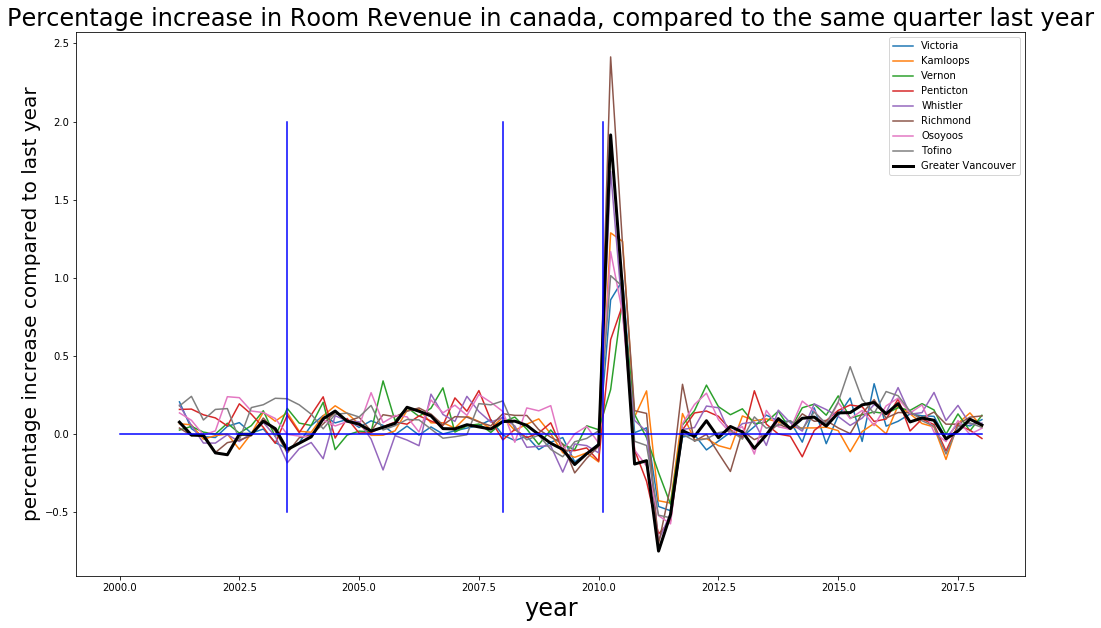

In [55]:
valid_regions = ['UC04','UC06','UC17','UC18','UC20','UC24','UC33','UC40','RD15']
valid_name = ['Victoria','Kamloops','Vernon','Penticton','Whistler','Richmond','Osoyoos','Tofino','Greater Vancouver']

plt.figure(figsize = (17,10))
for codes in valid_regions:
    vrv_part = vrv_new[vrv_new.region_code == codes]
    vrv_part = pd.DataFrame(vrv_part.groupby(['year','quarter'])['revenue'].sum()).reset_index()
    vrv_part['time_in_order'] = (vrv_part['year'].reset_index(drop = True) + pd.Series([a/4 for a in vrv_part['quarter']])).tolist()
    
    vrv_van = pd.DataFrame()
    vrv_van_pre = vrv_part
    for m in vrv_van_pre.quarter.unique():
        sub = vrv_van_pre[vrv_van_pre.quarter == m]
        sub['prev_val'] = np.NaN
        sub['prev_val'][1:] =  sub['revenue'][:-1].tolist()
        vrv_van = pd.concat([vrv_van,sub])
    vrv_van['prec_increase'] = vrv_van['revenue'] / vrv_van['prev_val']
    vrv_van = vrv_van.sort_values('time_in_order')

    if codes == 'RD15':
        plt.plot(vrv_van.time_in_order,vrv_van.prec_increase-1,linewidth = 3,color = 'black')
    else:
        plt.plot(vrv_van.time_in_order,vrv_van.prec_increase-1)


    
    
plt.legend(valid_name)
plt.plot([2008,2008],[-.5,2],color = 'blue')
plt.plot([2003.5,2003.5],[-.5,2],color = 'blue')
plt.plot([2010+1/12,2010+1/12],[-.5,2],color = 'blue')
plt.plot([2000,2018],[0,0],color = 'blue')
plt.xlabel('year',fontsize = 24)
plt.ylabel('percentage increase compared to last year',fontsize = 20)
plt.title('Percentage increase in Room Revenue in canada, compared to the same quarter last year',fontsize = 24)



Text(0.5, 1.0, 'Percentage increase in Room Revenue in canada, compared to the same quarter in 2000')

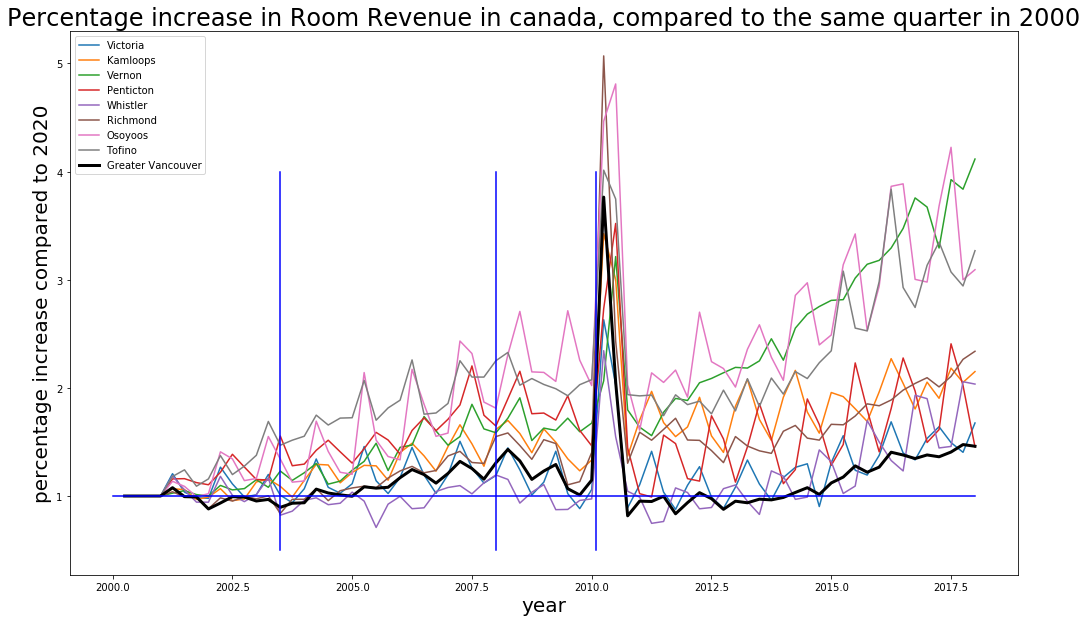

In [56]:
valid_regions = ['UC04','UC06','UC17','UC18','UC20','UC24','UC33','UC40','RD15']
valid_name = ['Victoria','Kamloops','Vernon','Penticton','Whistler','Richmond','Osoyoos','Tofino','Greater Vancouver']

plt.figure(figsize = (17,10))
for codes in valid_regions:
    vrv_part = vrv_new[vrv_new.region_code == codes]
    vrv_part = pd.DataFrame(vrv_part.groupby(['year','quarter'])['revenue'].sum()).reset_index()
    vrv_part['time_in_order'] = (vrv_part['year'].reset_index(drop = True) + pd.Series([a/4 for a in vrv_part['quarter']])).tolist()
     
    vrv_van = pd.DataFrame()
    vrv_van_pre = vrv_part
    for m in vrv_van_pre.quarter.unique():
        sub = vrv_van_pre[vrv_van_pre.quarter == m]
        sub['prev_val'] = sub['revenue'].iloc[0]
        vrv_van = pd.concat([vrv_van,sub])
    vrv_van['prec_increase'] = vrv_van['revenue'] / vrv_van['prev_val']
    vrv_van = vrv_van.sort_values('time_in_order')

    if codes == 'RD15':
        plt.plot(vrv_van.time_in_order,vrv_van.prec_increase,linewidth = 3,color = 'black')
    else:
        plt.plot(vrv_van.time_in_order,vrv_van.prec_increase)


    
plt.legend(valid_name)
plt.plot([2008,2008],[.5,4],color = 'blue')
plt.plot([2003.5,2003.5],[.5,4],color = 'blue')
plt.plot([2010+1/12,2010+1/12],[.5,4],color = 'blue')
plt.plot([2000,2018],[1,1],color = 'blue')
   
plt.xlabel('year',fontsize = 20)
plt.ylabel('percentage increase compared to 2020',fontsize = 20)
plt.title('Percentage increase in Room Revenue in canada, compared to the same quarter in 2000',fontsize = 24)




In [57]:
vei = pd.read_csv('{0}Vancouver/{1}.csv'.format(pathh,'vancouver_employment_by_industry'))
vei.industry_code = [a.replace('  ',' ')for a in vei.industry_code]

In [58]:
ind_ei = pd.read_csv('ei_index2.csv')
ind_ei = ind_ei.iloc[:,:2]
ind_ei.columns = ['industry','industry_code']
ind_ei['industry_code'] = [str(a).replace(' - ',' ') for a in ind_ei.iloc[:,1]]

In [59]:
vei = vei.merge(ind_ei,how = 'left',left_on = 'industry_code',right_on = 'industry_code')

In [60]:
industries_other = ['Agriculture','Forestry, fishing, mining, quarrying, oil and gas','Utilities',
              'Manufacturing','Trade','Finance, Insurance, Real Estate and Leasing',
              'Professional, Scientific and Technical Services','Business, Building and Other Support Services',
              'Educational Services', 'Health Care and Social Assistance','Information, culture and recreation',
              'Other services','Public administration']
industries_of_concern = ['Construction','Transportation and Warehousing',
                'Accommodation and food services']
industries = industries_other + industries_of_concern

Vancouver partial workforce data cited from https://www.statista.com/statistics/787267/labor-force-size-forecast-canada/

canada workforce from https://fred.stlouisfed.org/series/LFWA64TTCAM647S#0

employment rate: https://www.kaggle.com/ortizmacleod/employment-rate-canada/data#



Text(0.5, 1.0, 'Canada total employment rate')

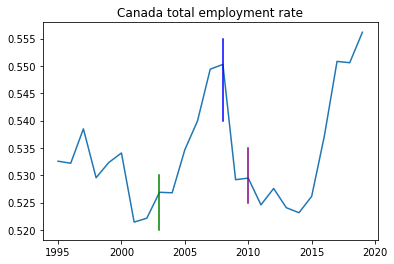

In [61]:
vei_work_force = pd.DataFrame(vei.groupby('year')['value'].sum()).reset_index()
canada_wf = [np.NaN]*13+[15.8]+[np.NaN]*9+[18.4] +[np.NaN]*4+[19.2,19.4,19.6,19.8,20.1]
vei_work_force['work_force'] = canada_wf
vei_work_force['work_force'] = vei_work_force['work_force'] *1e6

cn_wf = [np.NaN]*8 + [232869700,235681300,238275700,240740400,243258900,246249400,249544500,
252928600,255804000,258833300,262029100,265129800,268007000,270892100,
273862800,276671600,278844900,280766100,282578300,284138700,285320100,
286630500,287887400,289993600,292566600]
vei_work_force['canada_work_force'] = cn_wf
vei_work_force = vei_work_force.iloc[8:,:]
vei_work_force['v_rate'] = vei_work_force['work_force']/vei_work_force['canada_work_force']
f2427 = .066505 +(0.067293 - 0.066505)*np.array([1/5,2/5,3/5,4/5])
f1323 =  0.064163 +(0.066505 - 0.064163)*np.arange(1,11)/11
f812 = 0.064163 -(0.066505 - 0.064163)/11 *np.arange(4,-1,-1)
vei_work_force['v_rate'].loc[8:12] = f812.tolist()
vei_work_force['v_rate'].loc[13:22] = f1323.tolist()
vei_work_force['v_rate'].loc[24:27] = f2427.tolist()
vei_work_force['work_force'] =vei_work_force['canada_work_force'] *vei_work_force['v_rate']
vei_work_force['rate'] = vei_work_force['value']/vei_work_force['work_force']



plt.plot(vei_work_force.year,vei_work_force.rate)

plt.plot([2003,2003],[.52,.53],color = 'green')
plt.plot([2010,2010],[.525,.535],color = 'purple')


plt.plot([2008,2008],[.54,.555],color = 'blue')

plt.title('Canada total employment rate')


0.9658616925138295


Text(0.5, 1.0, 'Canada total employment')

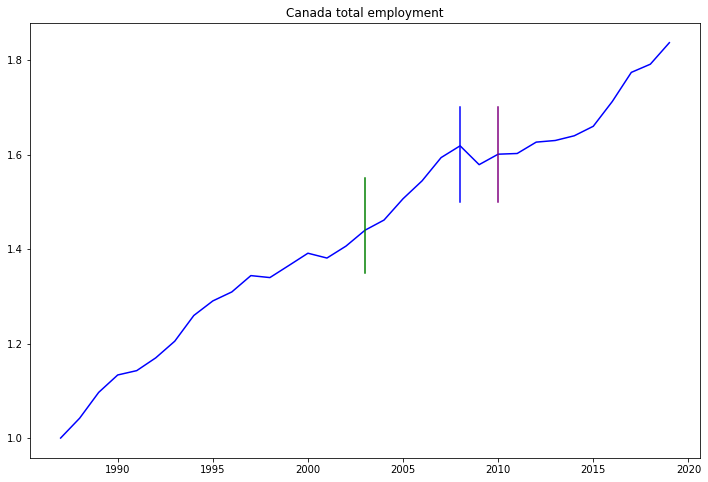

In [62]:

plt.figure(figsize = (12,8))
vei_total = pd.DataFrame(vei.groupby('year')['value'].sum()).reset_index()
saved_vei_total = vei_total.copy()
saved_vei_total['value']=vei_total['value']/vei_total['value'].iloc[0]


from sklearn.linear_model import LinearRegression
y = saved_vei_total[:17].iloc[:,1:2]
X = saved_vei_total[:17].iloc[:,:1]
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))

coef = reg.coef_[0][0]
interc = reg.intercept_[0]



plt.plot(vei_total.year,vei_total['value']/vei_total['value'].iloc[0],color = 'blue')

plt.plot([2003,2003],[1.35,1.55],color = 'green')
plt.plot([2010,2010],[1.5,1.7],color = 'purple')


plt.plot([2008,2008],[1.5,1.7],color = 'blue')

plt.title('Canada total employment')

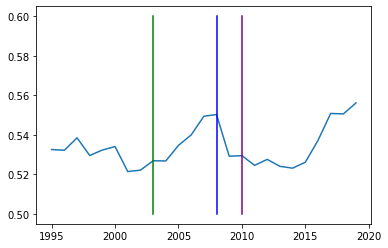

In [63]:
plt.plot(vei_work_force.year,vei_work_force.rate)
plt.plot([2003,2003],[.5,.6],color = 'green')
plt.plot([2010,2010],[.5,.6],color = 'purple')


plt.plot([2008,2008],[.5,.6],color = 'blue')


Text(0.5, 1.0, 'Canada employment by industry')

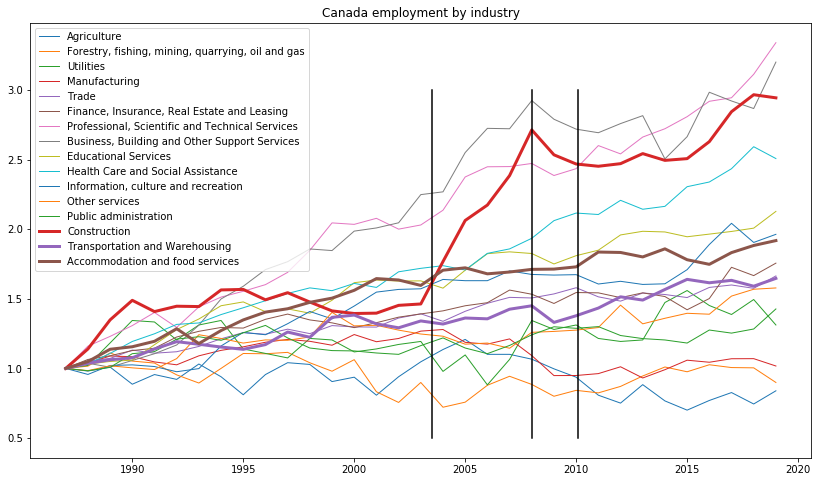

In [64]:
plt.figure(figsize = (14,8))
for i in industries:
    vei_total = vei[vei.industry == i]
    vei_total = vei_total.merge(saved_vei_total,how = 'left',left_on ='year',right_on = 'year')
    pl = 1
    if i in industries_of_concern:
        pl = 3
    plt.plot(vei_total.year,vei_total['value_x']/vei_total['value_x'].iloc[0],linewidth = pl)

     
plt.legend(industries)
plt.plot([2003.5,2003.5],[.5,3],color = 'black')
plt.plot([2010+1/12,2010+1/12],[.5,3],color = 'black')
plt.plot([2008,2008],[.5,3],color = 'black')
plt.title('Canada employment by industry')
   


Text(0.5, 1.0, 'Canada employment by industry')

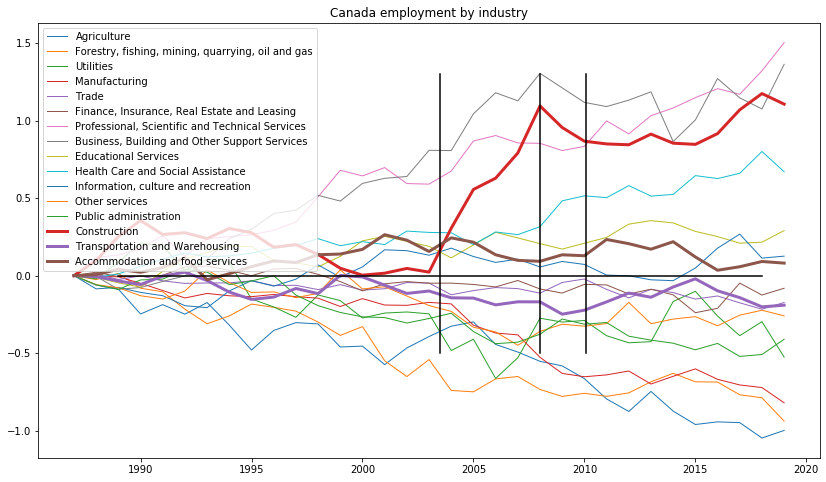

In [65]:
plt.figure(figsize = (14,8))
for i in industries:
    vei_total = vei[vei.industry == i]
    vei_total = vei_total.merge(saved_vei_total,how = 'left',left_on ='year',right_on = 'year')
    pl = 1
    if i in industries_of_concern:
        pl = 3
    plt.plot(vei_total.year,vei_total['value_x']/vei_total['value_x'].iloc[0] - vei_total['value_y'],linewidth = pl)

     
plt.legend(industries)
plt.plot([2003.5,2003.5],[-.5,1.3],color = 'black')
plt.plot([2010+1/12,2010+1/12],[-.5,1.3],color = 'black')
plt.plot([2008,2008],[-.5,1.3],color = 'black')
plt.plot([1989,2018],[0,0],color = 'black')
plt.title('Canada employment by industry')
   

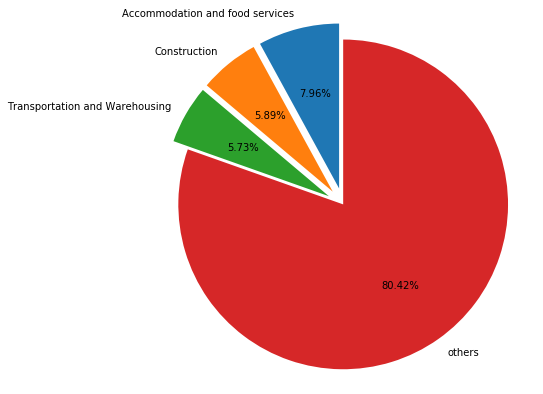

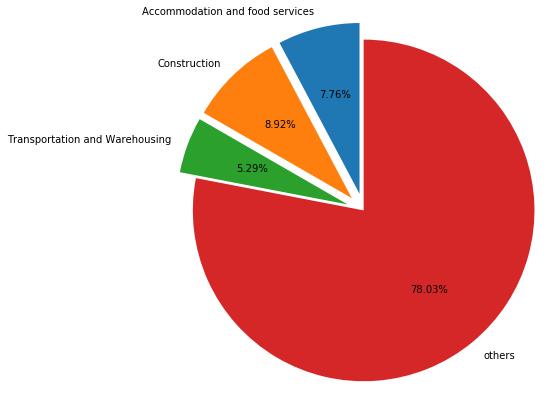

In [66]:
vei['industry_relevance'] = 'others'
for a in industries_of_concern:
    vei['industry_relevance'][vei.industry == a] = a


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
year = 2003  
vei1 = vei[vei.industry.isin(industries)]

temp_job = pd.DataFrame(vei1[vei1.year == year].groupby(['industry_relevance'])['value'].sum()).reset_index()
labels = temp_job['industry_relevance'].tolist()
sizes = temp_job['value']/sum(temp_job['value']) 
sizes = sizes.to_list()

explode = (0.1, 0.1, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize = (7,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()



# Pie chart, where the slices will be ordered and plotted counter-clockwise:
year = 2010  
vei1 = vei[vei.industry.isin(industries)]
temp_job = pd.DataFrame(vei1[vei1.year == year].groupby(['industry_relevance'])['value'].sum()).reset_index()
labels = temp_job['industry_relevance'].tolist()
sizes = temp_job['value']/sum(temp_job['value']) 
sizes = sizes.to_list()

#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize = (7,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [67]:
vei

year         industry_code      value  \
0     1987.0                     0  1377700.0   
1     1987.0  11,21,22,23,31,32,33   333800.0   
...      ...                   ...        ...   
4651  2019.0                  9120    35400.0   
4652  2019.0      9130, 9141, 9191    37900.0   

                                               industry industry_relevance  
0                                                   NaN             others  
1                                Goods-Producing Sector             others  
...                                                 ...                ...  
4651     Provincial and Territorial Public Administr...             others  
4652     Local, Municipal & Regional Public Administ...             others  

[4653 rows x 5 columns]

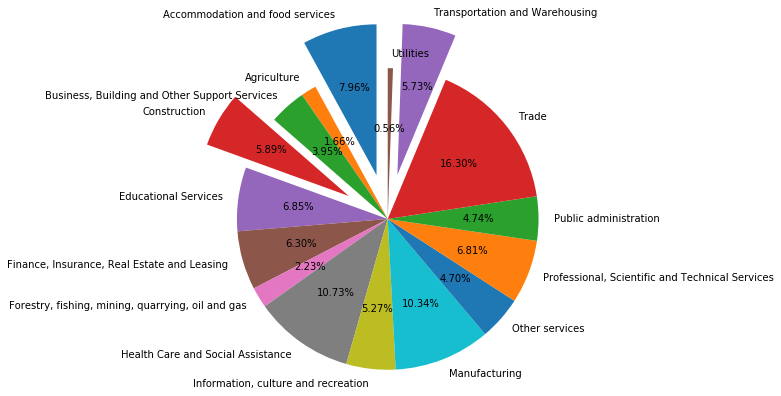

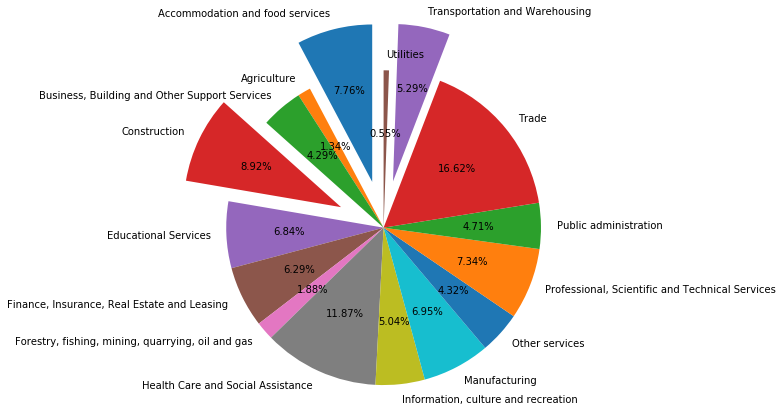

In [68]:
industries

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
year = 2003    
temp_job = pd.DataFrame(vei[vei.year == year].groupby(['industry'])['value'].sum()).reset_index()
temp_job = temp_job[temp_job.industry.isin(industries)]

labels = temp_job['industry'].tolist()
sizes = temp_job['value']/sum(temp_job['value']) 
sizes = sizes.to_list()

explode = [0.3]+[0]*2 +[0.3]+[0]*10+[0.3,0] 

fig1, ax1 = plt.subplots(figsize = (7,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        startangle=90)#
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


year = 2010    
temp_job = pd.DataFrame(vei[vei.year == year].groupby(['industry'])['value'].sum()).reset_index()
temp_job = temp_job[temp_job.industry.isin(industries)]

labels = temp_job['industry'].tolist()
sizes = temp_job['value']/sum(temp_job['value']) 
sizes = sizes.to_list()

explode = [0.3]+[0]*2 +[0.3]+[0]*10+[0.3,0] 

fig1, ax1 = plt.subplots(figsize = (7,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        startangle=90)#
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()